In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage

Part 1: Clustering: Define the problem and perform Exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables

In [3]:
df = pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

In [4]:
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [6]:
df.shape

(23066, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [5]:
df.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       1.000000e+00  1.000000e+00       1.000000      0.000000   
25%       1.828250e+04  7.990500e+03     710.000000     85.180000   
50%       2.580875e+05  2.252900e+05    4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06   12793.750000   3121.400000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  18330.000000  18330.000000  18330.000000  
mean       0.335123   1924.252331      0.073661      7.672045      0.351061  
std        0.031963   3105.238410      0.075160      6.481391      0.343334  
min        0.210000      0.000000      0.000100      0.000000      0.000000  
25%        0.330000     55.365375      0.002600      1.710000      0.090000  
50%        0.350000    926.335000      0.082550      7.660000      0.160000  
75%        0.350000   2091.338150      0.130000     12.510000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

In [87]:
df.duplicated().sum()

0

In [10]:
df['Ad Type'].value_counts()

Ad Type
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: count, dtype: int64

In [11]:
df['Platform'].value_counts()

Platform
Video    9873
Web      8251
App      4942
Name: count, dtype: int64

In [12]:
df['Device Type'].value_counts()

Device Type
Mobile     14806
Desktop     8260
Name: count, dtype: int64

In [15]:
df['Format'].value_counts()

Format
Video      11552
Display    11514
Name: count, dtype: int64

In [6]:
df_cat = df.select_dtypes(include = 'object')
df_cat

Timestamp InventoryType   Ad Type Platform Device Type   Format
0       2020-9-2-17       Format1  Inter222    Video     Desktop  Display
1       2020-9-2-10       Format1  Inter227      App      Mobile    Video
2       2020-9-1-22       Format1  Inter222    Video     Desktop  Display
3       2020-9-3-20       Format1  Inter228    Video      Mobile    Video
4       2020-9-4-15       Format1  Inter217      Web     Desktop    Video
...             ...           ...       ...      ...         ...      ...
23061   2020-9-13-7       Format5  Inter220      Web      Mobile    Video
23062   2020-11-2-7       Format5  Inter224      Web     Desktop    Video
23063  2020-9-14-22       Format5  Inter218      App      Mobile    Video
23064  2020-11-18-2       Format4  inter230    Video      Mobile    Video
23065   2020-9-14-0       Format5  Inter221      App      Mobile    Video

[23066 rows x 6 columns]

In [7]:
df_cat_1= df_cat.drop(['Timestamp'],axis = 1)

In [8]:
df_cat_1

InventoryType   Ad Type Platform Device Type   Format
0           Format1  Inter222    Video     Desktop  Display
1           Format1  Inter227      App      Mobile    Video
2           Format1  Inter222    Video     Desktop  Display
3           Format1  Inter228    Video      Mobile    Video
4           Format1  Inter217      Web     Desktop    Video
...             ...       ...      ...         ...      ...
23061       Format5  Inter220      Web      Mobile    Video
23062       Format5  Inter224      Web     Desktop    Video
23063       Format5  Inter218      App      Mobile    Video
23064       Format4  inter230    Video      Mobile    Video
23065       Format5  Inter221      App      Mobile    Video

[23066 rows x 5 columns]

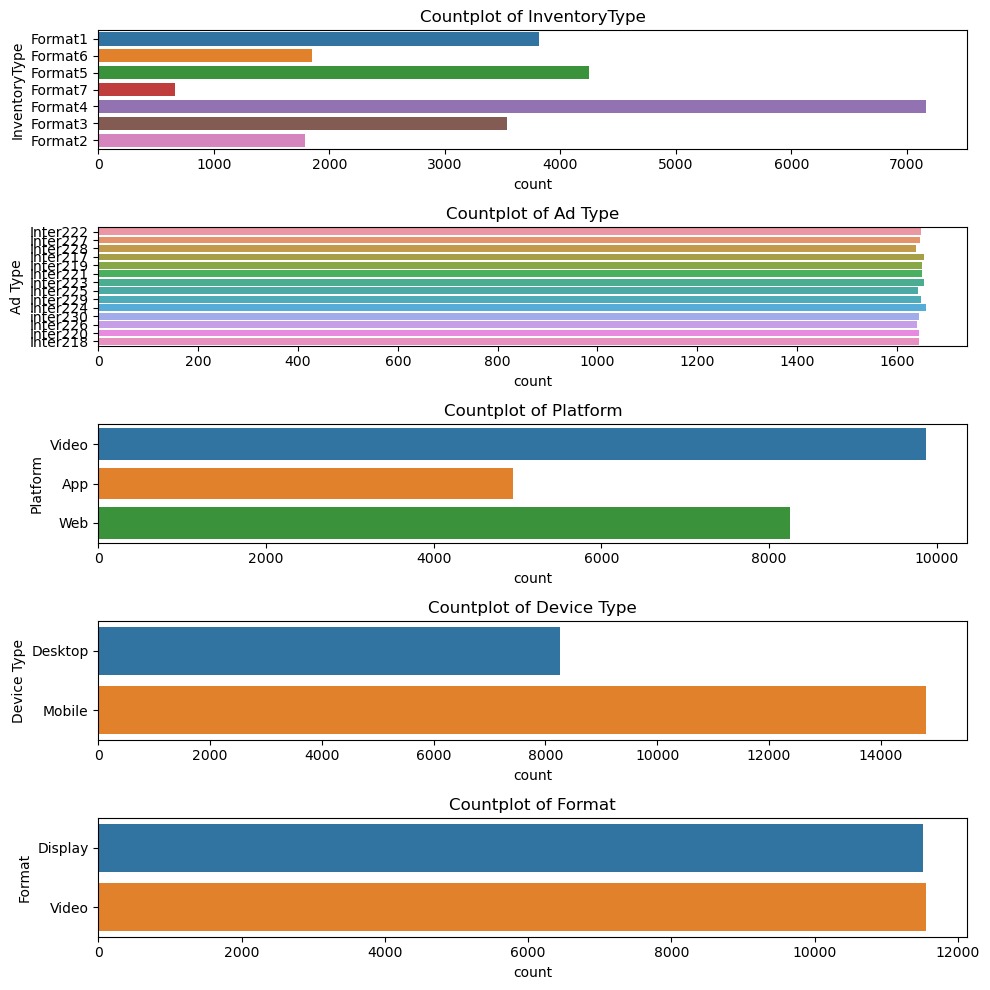

In [75]:
plt.figure(figsize=(10,10))
cat_list = df_cat_1.columns
for i in range (len(cat_list)):
    plt.subplot(5,1, i+1)
    sns.countplot(data =df, y = df[cat_list[i]])
    plt.title('Countplot of {}'.format(cat_list[i]))
    plt.tight_layout()

In [9]:
num_col = df.select_dtypes(include=['int', 'float'])

In [10]:
num_col.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [5]:
len(num_col.columns)

13

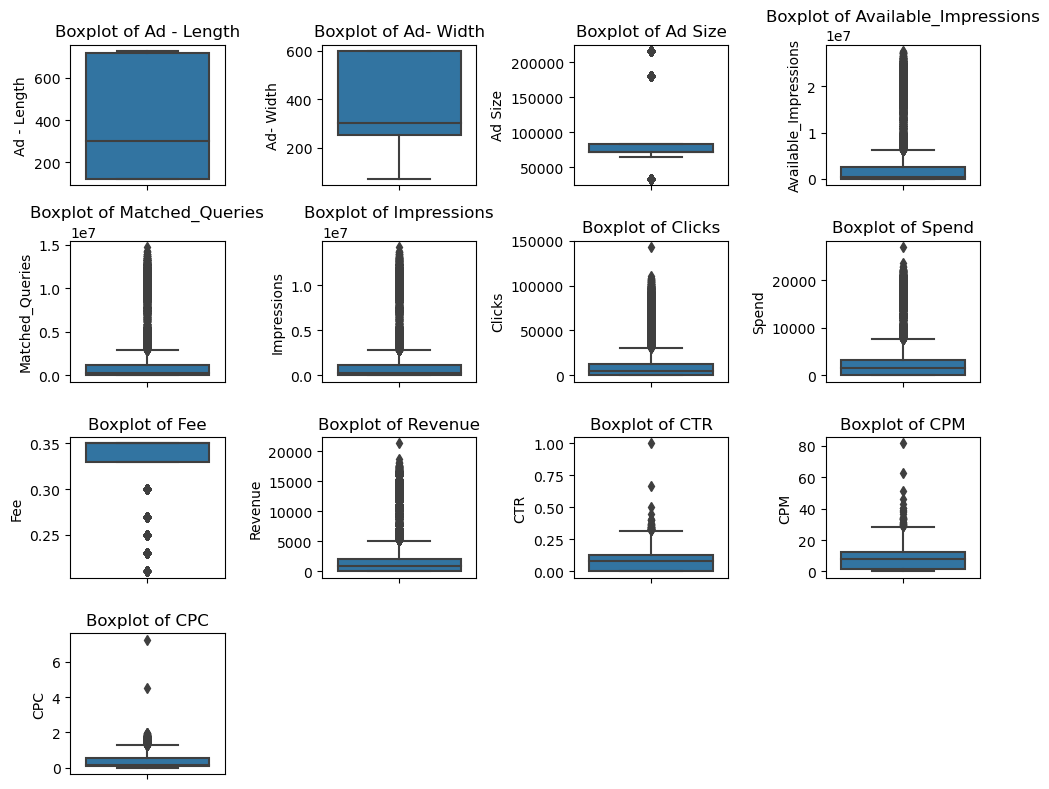

In [6]:
plt.figure(figsize= (10,8))
feature_list = num_col.columns
for i in range (len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df, y = df[feature_list[i]])
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

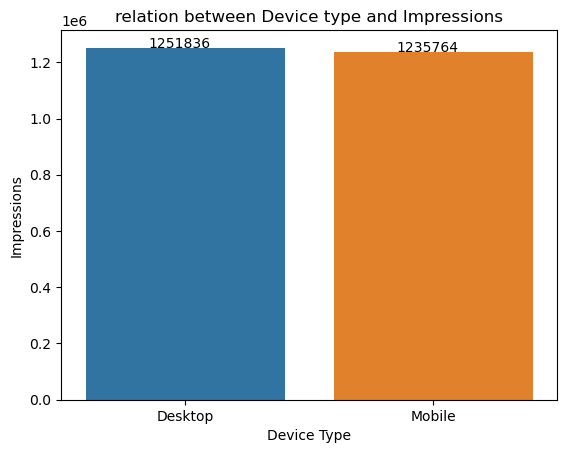

In [81]:
plt.title('Relation between Device type and Impressions')
ax = sns.barplot(data = df, x ='Device Type', y = 'Impressions', ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

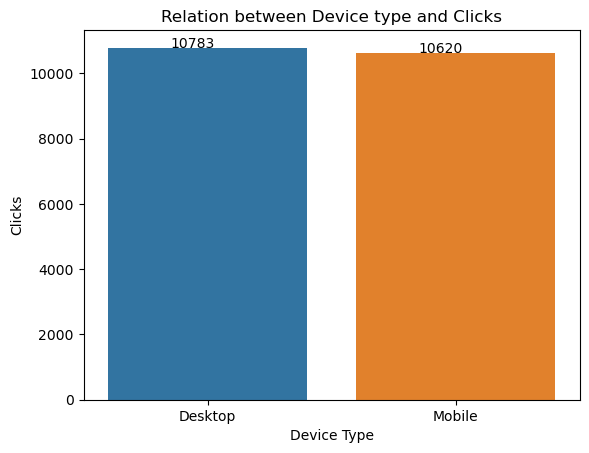

In [82]:
plt.title('Relation between Device type and Clicks')
ax = sns.barplot(data = df, x ='Device Type', y = 'Clicks', ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

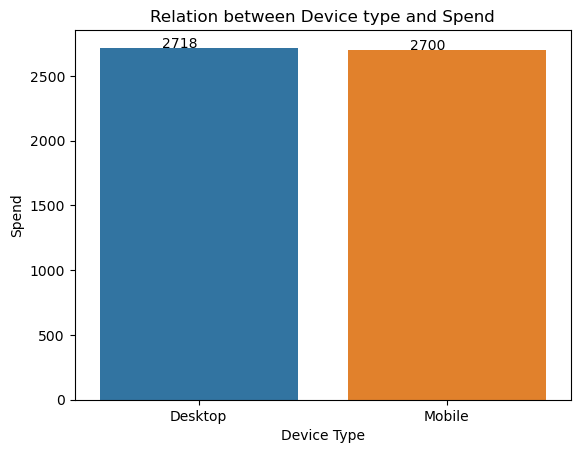

In [83]:
plt.title('Relation between Device type and Spend')
ax = sns.barplot(data = df, x ='Device Type', y = 'Spend', ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

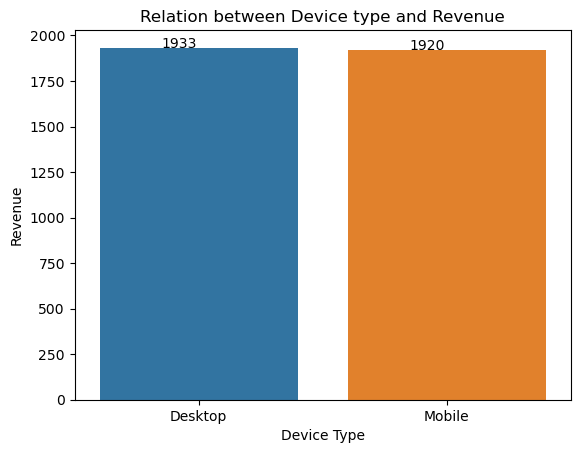

In [84]:
plt.title('Relation between Device type and Revenue')
ax = sns.barplot(data = df, x ='Device Type', y = 'Revenue', ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

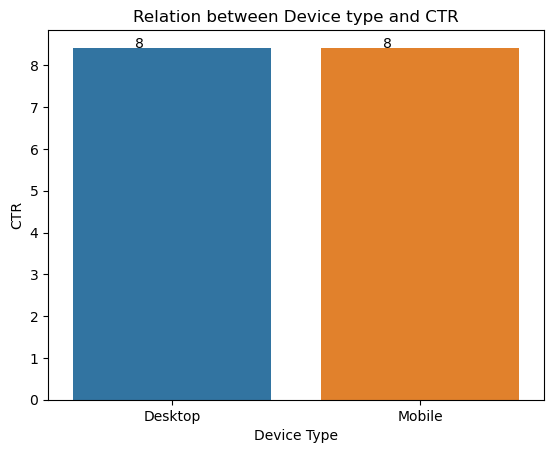

In [85]:
plt.title('Relation between Device type and CTR')
ax = sns.barplot(data = df, x ='Device Type', y = 'CTR', ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

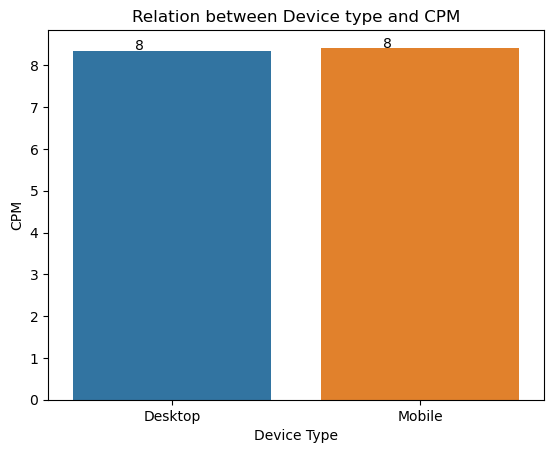

In [86]:
plt.title('Relation between Device type and CPM')
ax = sns.barplot(data = df, x ='Device Type', y = 'CPM', ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

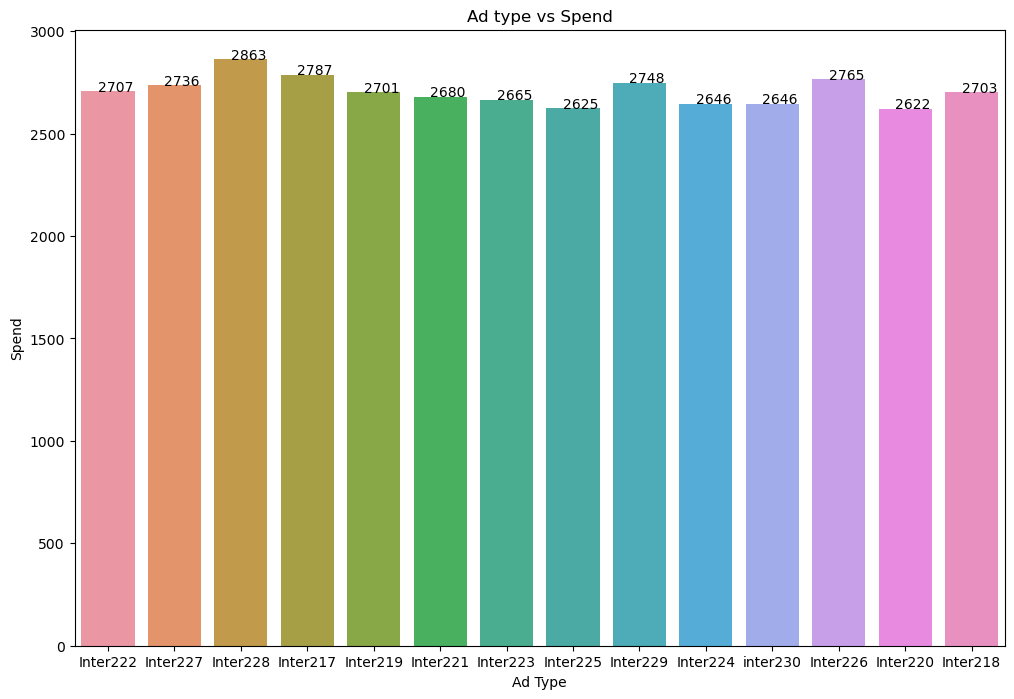

In [87]:
plt.figure(figsize= (12,8))
plt.title('Ad type vs Spend')
ax = sns.barplot(data = df, x ='Ad Type', y = 'Spend' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

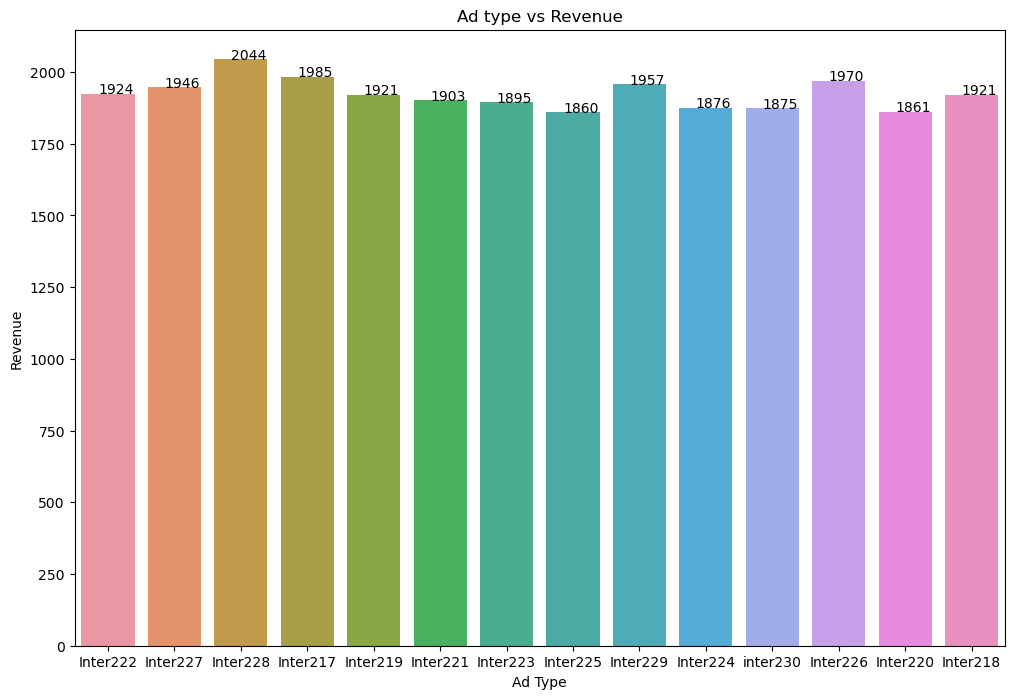

In [88]:
plt.figure(figsize= (12,8))
plt.title('Ad type vs Revenue')
ax = sns.barplot(data = df, x ='Ad Type', y = 'Revenue' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

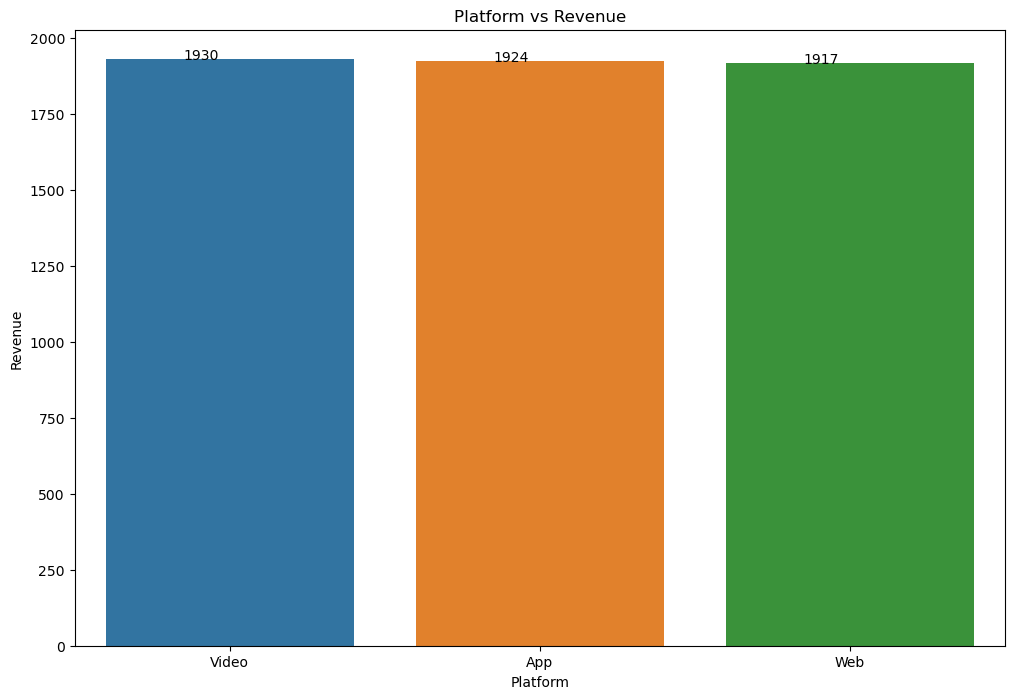

In [89]:
plt.figure(figsize= (12,8))
plt.title('Platform vs Revenue')
ax = sns.barplot(data = df, x ='Platform', y = 'Revenue' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

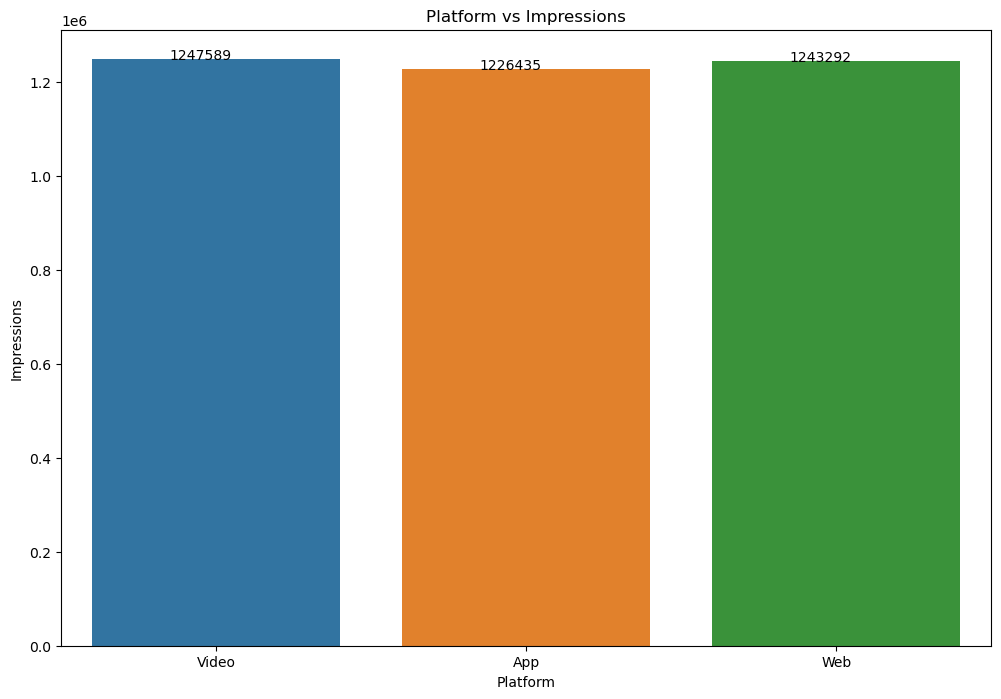

In [90]:
plt.figure(figsize= (12,8))
plt.title('Platform vs Impressions')
ax = sns.barplot(data = df, x ='Platform', y = 'Impressions' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

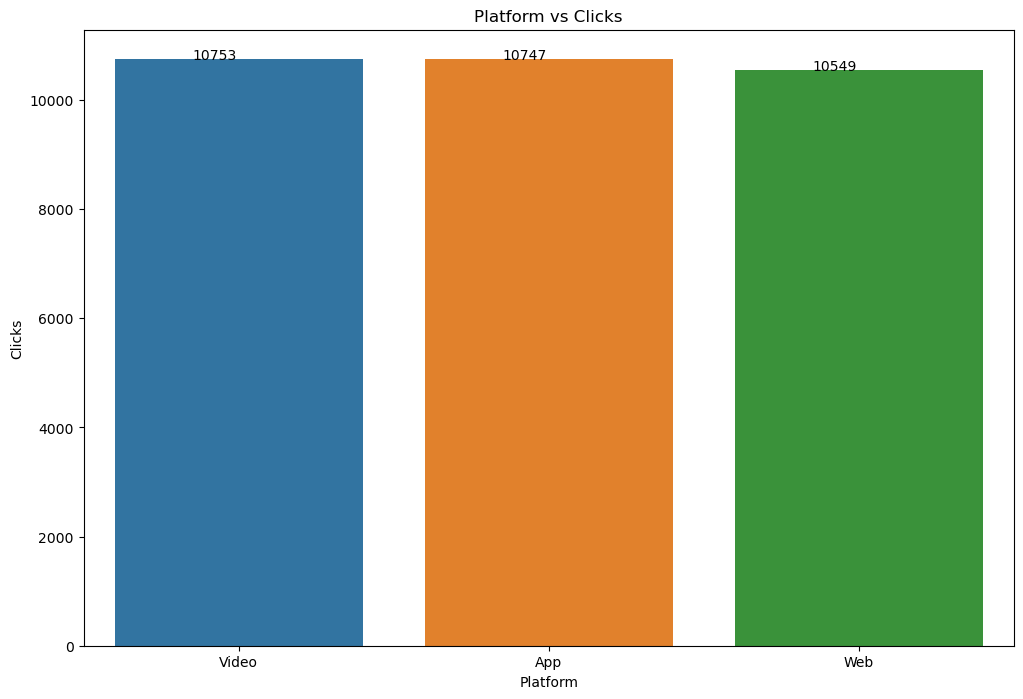

In [91]:
plt.figure(figsize= (12,8))
plt.title('Platform vs Clicks')
ax = sns.barplot(data = df, x ='Platform', y = 'Clicks' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

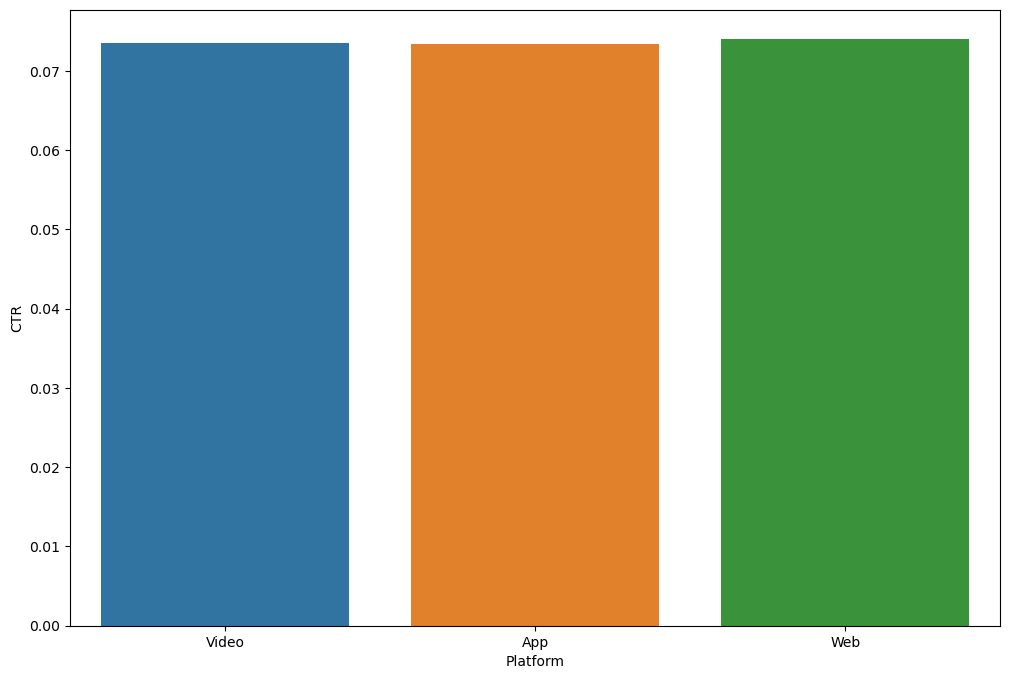

In [43]:
plt.figure(figsize= (12,8))
ax = sns.barplot(data = df, x ='Platform', y = 'CTR' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

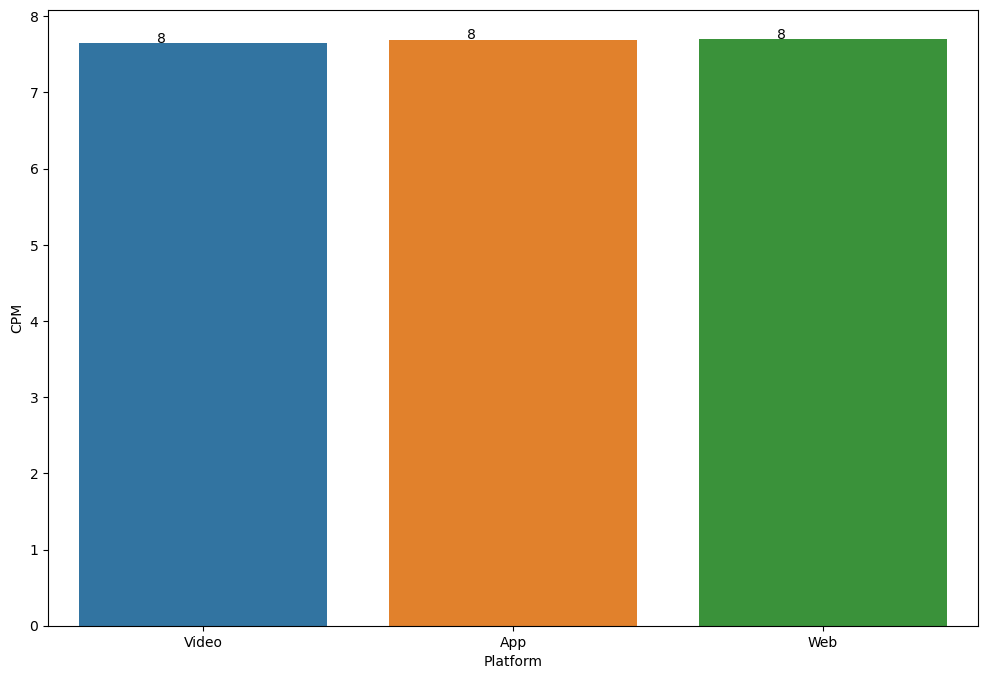

In [44]:
plt.figure(figsize= (12,8))
ax = sns.barplot(data = df, x ='Platform', y = 'CPM' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

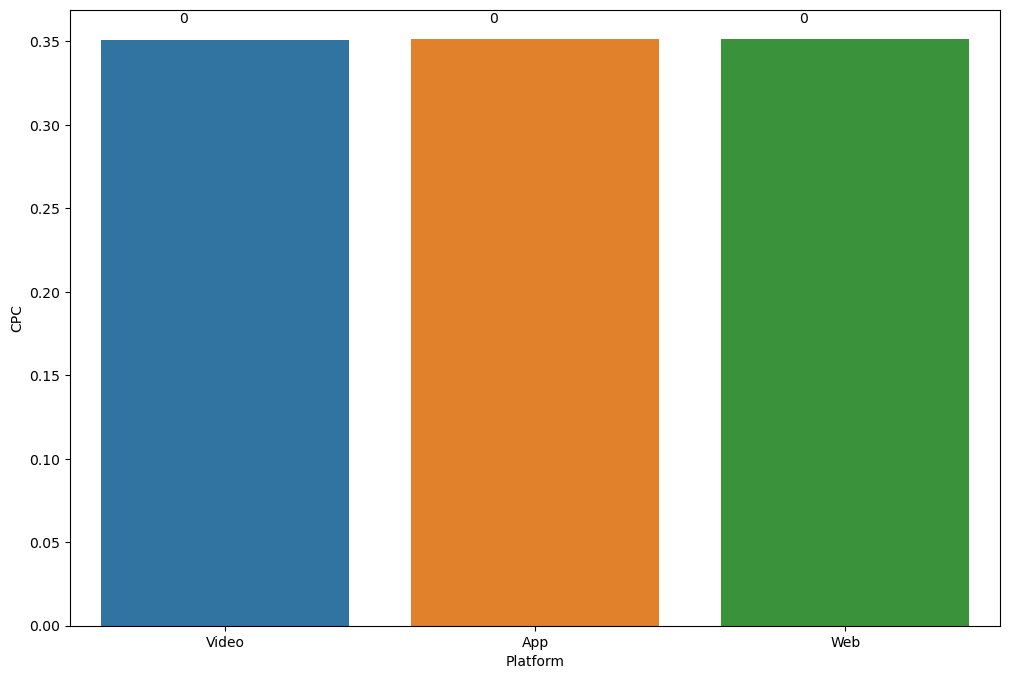

In [45]:
plt.figure(figsize= (12,8))
ax = sns.barplot(data = df, x ='Platform', y = 'CPC' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

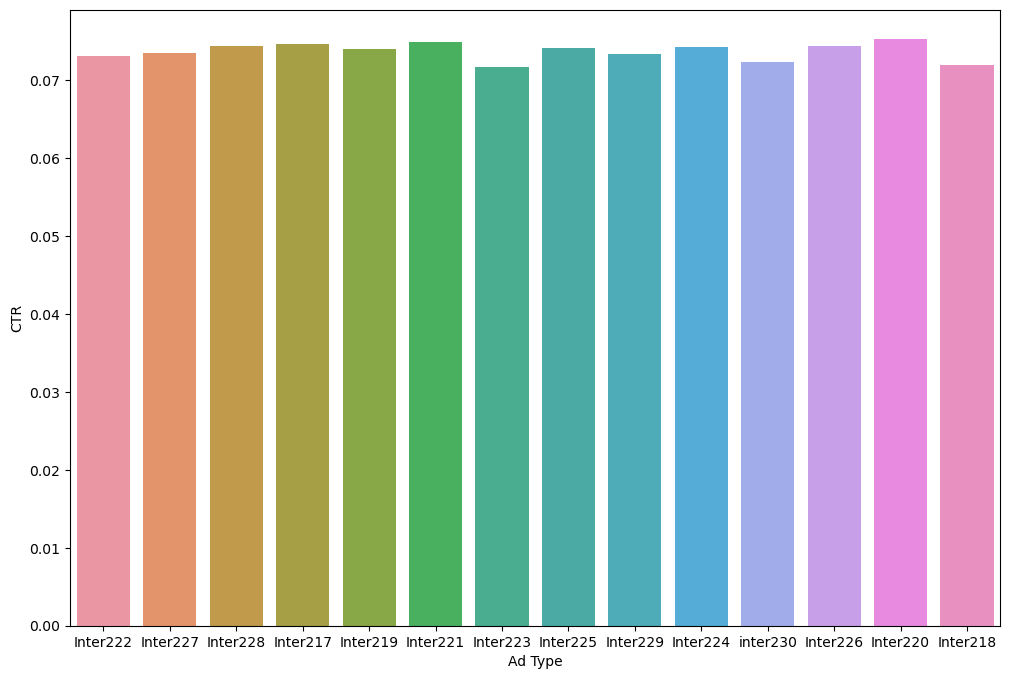

In [46]:
plt.figure(figsize= (12,8))
ax = sns.barplot(data = df, x ='Ad Type', y = 'CTR' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

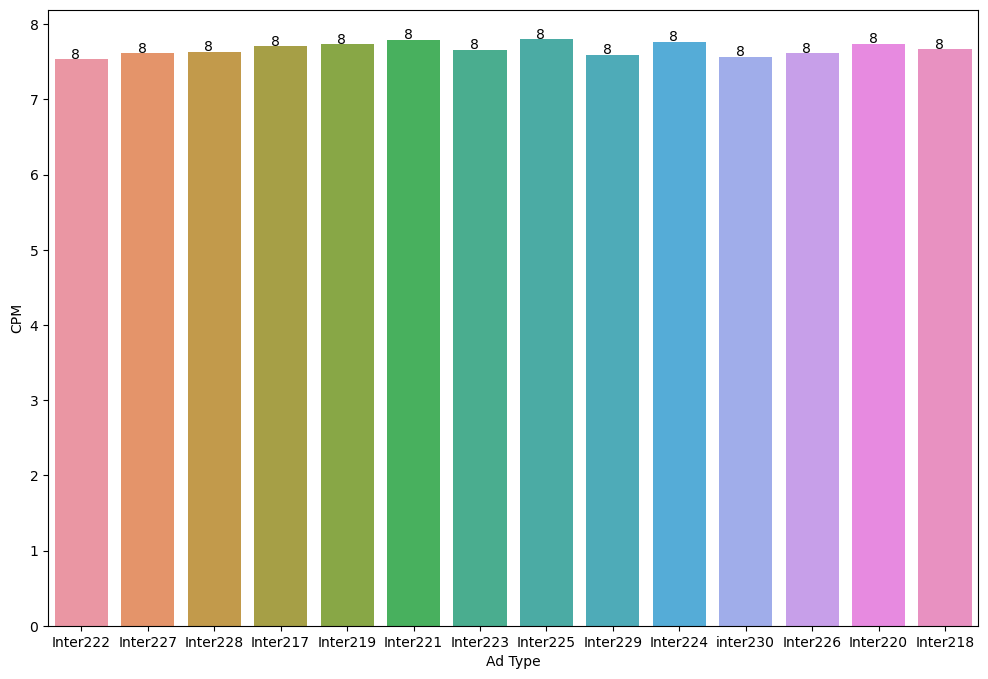

In [47]:
plt.figure(figsize= (12,8))
ax = sns.barplot(data = df, x ='Ad Type', y = 'CPM' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

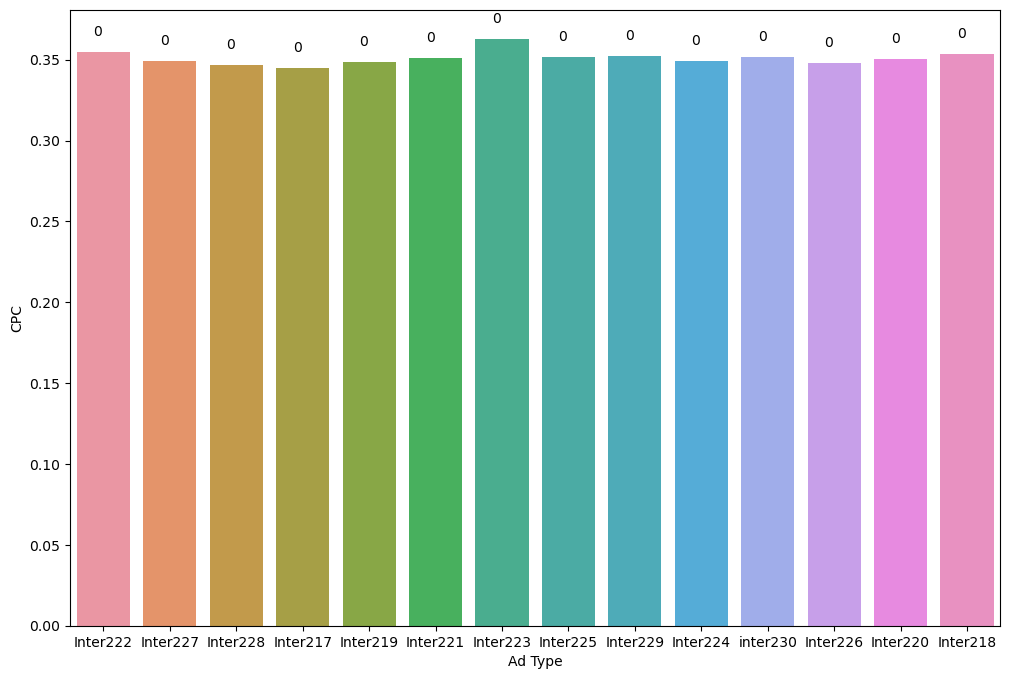

In [48]:
plt.figure(figsize= (12,8))
ax = sns.barplot(data = df, x ='Ad Type', y = 'CPC' , ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

Insights : write all the insights from the above univariate and bivariate plots.

Part 1: Clustering: Data Preprocessing
- Missing value check and treatment - Outlier Treatment - z-score scaling Note: Treat missing values in CPC, CTR and CPM using the formula given.

In [8]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [15]:
df.iloc[: , -3:]

CTR  CPM  CPC
0      0.0031  0.0  0.0
1      0.0035  0.0  0.0
2      0.0028  0.0  0.0
3      0.0020  0.0  0.0
4      0.0041  0.0  0.0
...       ...  ...  ...
23061     NaN  NaN  NaN
23062     NaN  NaN  NaN
23063     NaN  NaN  NaN
23064     NaN  NaN  NaN
23065     NaN  NaN  NaN

[23066 rows x 3 columns]

In [69]:
#df_missing = df.iloc[:, [11, 12, 13,16,17,18]]

In [16]:
#df_missing

In [11]:
def calculate_CTR(x):
    clicks = df.Clicks
    impressions = df.Impressions
    CTR = clicks/impressions*100
    return CTR

In [12]:
df['CTR'] = df[['CTR']].apply(lambda x: calculate_CTR(x))

In [13]:
def calculate_CPM(x):
    spend = df.Spend
    impressions = df.Impressions
    CPM = (spend/impressions)*1000
    return CPM

In [14]:
df['CPM'] = df[['CPM']].apply(lambda x: calculate_CPM(x))

In [15]:
def calculate_CPC(x):
    spend = df.Spend
    clicks = df.Clicks
    CPC = spend/clicks
    return CPC

In [16]:
df['CPC'] = df[['CPC']].apply(lambda x: calculate_CPC(x))

In [17]:
df.iloc[: , -5:]

Fee  Revenue         CTR   CPM   CPC
0      0.35   0.0000    0.309598   0.0  0.00
1      0.35   0.0000    0.350877   0.0  0.00
2      0.35   0.0000    0.281690   0.0  0.00
3      0.35   0.0000    0.202020   0.0  0.00
4      0.35   0.0000    0.413223   0.0  0.00
...     ...      ...         ...   ...   ...
23061  0.35   0.0455  100.000000  70.0  0.07
23062  0.35   0.0260   50.000000  20.0  0.04
23063  0.35   0.0325  100.000000  50.0  0.05
23064  0.35   0.0455  100.000000  70.0  0.07
23065  0.35   0.0585   50.000000  45.0  0.09

[23066 rows x 5 columns]

In [18]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

we can see from the above function we dont have missing values for the CTR, CPM and CPC variables.

In [136]:
df.duplicated().sum()

0

In [19]:
df_col = df.select_dtypes(include=['int', 'float'])

In [20]:
df_col

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
0              300        250    75000                   1806   
1              300        250    75000                   1780   
2              300        250    75000                   2727   
3              300        250    75000                   2430   
4              300        250    75000                   1218   
...            ...        ...      ...                    ...   
23061          720        300   216000                      1   
23062          720        300   216000                      3   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue         CTR  \
0                  325          323       1   0.00  0.35   0.0000    0.309598   
1                  285          285       1   0.00  0.35   0.0000    0.350877   
2                  356          355       1   0.00  0.35   0.0000    0.281690   
3                  497          495       1   0.00  0.35   0.0000    0.202020   
4                  242          242       1   0.00  0.35   0.0000    0.413223   
...                ...          ...     ...    ...   ...      ...         ...   
23061                1            1       1   0.07  0.35   0.0455  100.000000   
23062                2            2       1   0.04  0.35   0.0260   50.000000   
23063                1            1       1   0.05  0.35   0.0325  100.000000   
23064                1            1       1   0.07  0.35   0.0455  100.000000   
23065                2            2       1   0.09  0.35   0.0585   50.000000   

        CPM   CPC  
0       0.0  0.00  
1       0.0  0.00  
2       0.0  0.00  
3       0.0  0.00  
4       0.0  0.00  
...     ...   ...  
23061  70.0  0.07  
23062  20.0  0.04  
23063  50.0  0.05  
23064  70.0  0.07  
23065  45.0  0.09  

[23066 rows x 13 columns]

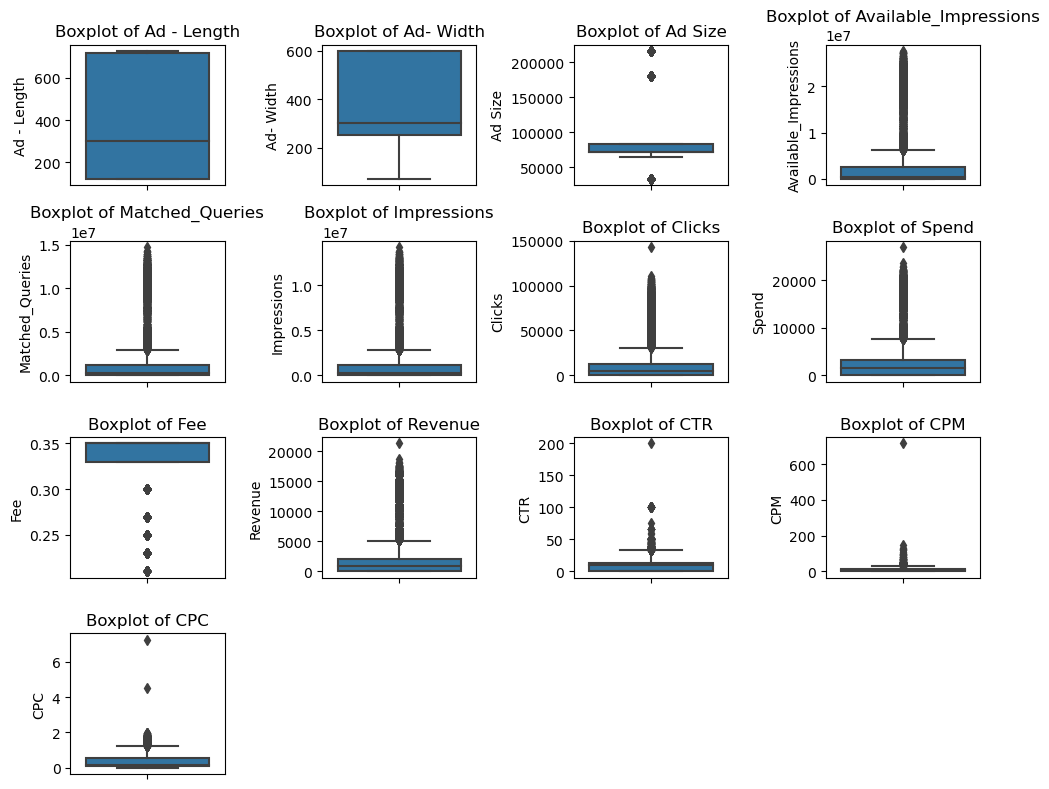

In [21]:
plt.figure(figsize= (10,8))
fl = df_col.columns
for i in range (len(fl)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df, y = df[fl[i]])
    plt.title('Boxplot of {}'.format(fl[i]))
    plt.tight_layout()

In [22]:
len(df_col.columns)

13

In [23]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [24]:
for i in df_col:
    LL, UL = remove_outlier(df_col[i])
    df_col[i] = np.where(df_col[i] > UL, UL, df_col[i])
    df_col[i] = np.where(df_col[i] < LL, LL, df_col[i])

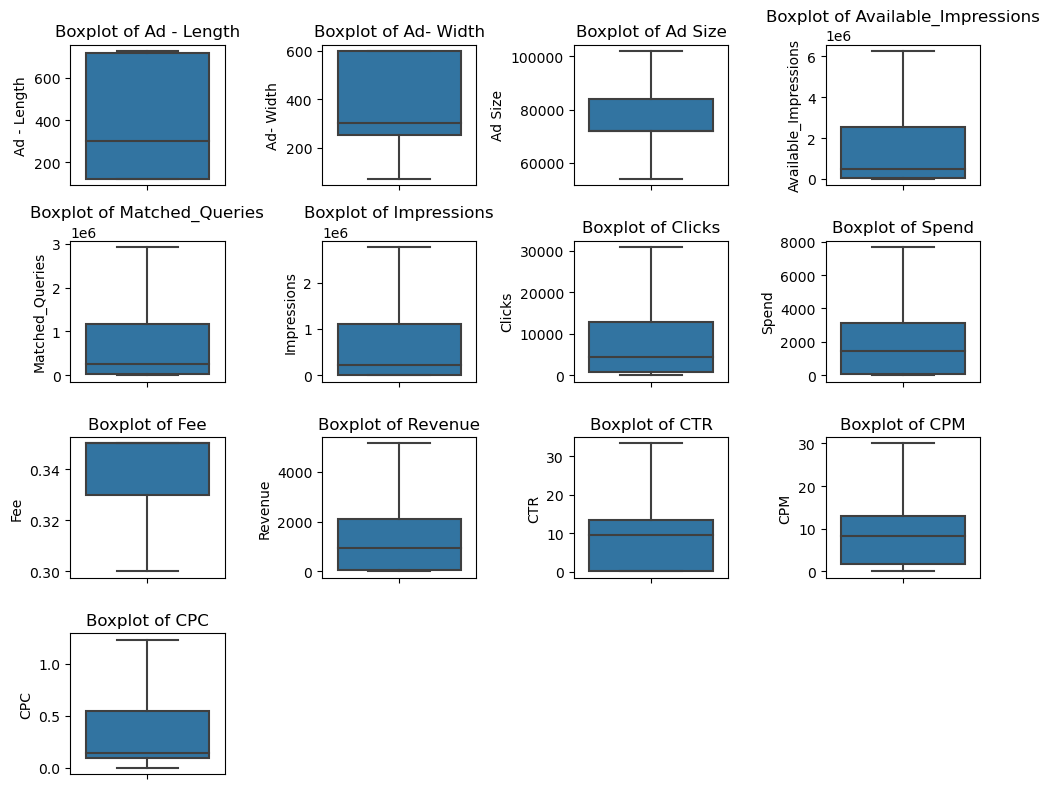

In [25]:
plt.figure(figsize= (10,8))
fl = df_col.columns
for i in range (len(fl)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df_col, y = df_col[fl[i]])
    plt.title('Boxplot of {}'.format(fl[i]))
    plt.tight_layout()

Missing values for the numerical columns has been treated

In [36]:
df_col.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   76576.835169           1.607253e+06   
std      233.651434    203.092885   15381.320695           2.125528e+06   
min      120.000000     70.000000   54000.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  102000.000000           6.268771e+06   

       Matched_Queries   Impressions        Clicks         Spend  \
count     2.306600e+04  2.306600e+04  23066.000000  23066.000000   
mean      7.995380e+05  7.536120e+05   8306.828194   2166.060098   
std       1.026037e+06  9.802568e+05   9574.779384   2425.189632   
min       1.000000e+00  1.000000e+00      1.000000      0.000000   
25%       1.828250e+04  7.990500e+03    710.000000     85.180000   
50%       2.580875e+05  2.252900e+05   4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06  12793.750000   3121.400000   
max       2.924326e+06  2.769086e+06  30919.375000   7675.730000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  23066.000000  23066.000000  23066.000000  
mean       0.340288   1449.388572      8.223203      8.219181      0.330035  
std        0.018129   1646.893583      8.253522      6.881016      0.316568  
min        0.300000      0.000000      0.010874      0.000000      0.000000  
25%        0.330000     55.365375      0.265107      1.749084      0.089736  
50%        0.350000    926.335000      9.391248      8.371566      0.139347  
75%        0.350000   2091.338150     13.470571     13.042018      0.546242  
max        0.350000   5145.297312     33.278766     29.981418      1.231002

In [33]:
df_col

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0            300.0      250.0   75000.0                 1806.0   
1            300.0      250.0   75000.0                 1780.0   
2            300.0      250.0   75000.0                 2727.0   
3            300.0      250.0   75000.0                 2430.0   
4            300.0      250.0   75000.0                 1218.0   
...            ...        ...       ...                    ...   
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
0                325.0        323.0     1.0   0.00  0.35   0.0000   0.309598   
1                285.0        285.0     1.0   0.00  0.35   0.0000   0.350877   
2                356.0        355.0     1.0   0.00  0.35   0.0000   0.281690   
3                497.0        495.0     1.0   0.00  0.35   0.0000   0.202020   
4                242.0        242.0     1.0   0.00  0.35   0.0000   0.413223   
...                ...          ...     ...    ...   ...      ...        ...   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  
0       0.000000  0.00  
1       0.000000  0.00  
2       0.000000  0.00  
3       0.000000  0.00  
4       0.000000  0.00  
...          ...   ...  
23061  29.981418  0.07  
23062  20.000000  0.04  
23063  29.981418  0.05  
23064  29.981418  0.07  
23065  29.981418  0.09  

[23066 rows x 13 columns]

In [34]:
req_col = df_col[['Impressions','Clicks','Spend','Revenue','CTR','CPM','CPC']]
req_col

Impressions  Clicks  Spend  Revenue        CTR        CPM   CPC
0            323.0     1.0   0.00   0.0000   0.309598   0.000000  0.00
1            285.0     1.0   0.00   0.0000   0.350877   0.000000  0.00
2            355.0     1.0   0.00   0.0000   0.281690   0.000000  0.00
3            495.0     1.0   0.00   0.0000   0.202020   0.000000  0.00
4            242.0     1.0   0.00   0.0000   0.413223   0.000000  0.00
...            ...     ...    ...      ...        ...        ...   ...
23061          1.0     1.0   0.07   0.0455  33.278766  29.981418  0.07
23062          2.0     1.0   0.04   0.0260  33.278766  20.000000  0.04
23063          1.0     1.0   0.05   0.0325  33.278766  29.981418  0.05
23064          1.0     1.0   0.07   0.0455  33.278766  29.981418  0.07
23065          2.0     1.0   0.09   0.0585  33.278766  29.981418  0.09

[23066 rows x 7 columns]

In [35]:
#Scale the data
from scipy.stats import zscore
df_scaled = df_col.apply(zscore)

In [38]:
df_scaled.head()

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -0.958836 -1.194498   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -0.953835 -1.194498   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -0.962218 -1.194498   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -0.971871 -1.194498   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -0.946281 -1.194498   

        CPC  
0 -1.042561  
1 -1.042561  
2 -1.042561  
3 -1.042561  
4 -1.042561

In [36]:
#only selecting the required columns for analsys instead of going for all columns
req_col_scaled = req_col.apply(zscore)
req_col_scaled.head

Impressions    Clicks     Spend   Revenue       CTR       CPM       CPC
0        -0.768478 -0.867488 -0.893170 -0.880093 -0.958836 -1.194498 -1.042561
1        -0.768516 -0.867488 -0.893170 -0.880093 -0.953835 -1.194498 -1.042561
2        -0.768445 -0.867488 -0.893170 -0.880093 -0.962218 -1.194498 -1.042561
3        -0.768302 -0.867488 -0.893170 -0.880093 -0.971871 -1.194498 -1.042561
4        -0.768560 -0.867488 -0.893170 -0.880093 -0.946281 -1.194498 -1.042561
...            ...       ...       ...       ...       ...       ...       ...
23061    -0.768806 -0.867488 -0.893141 -0.880066  3.035808  3.162718 -0.821435
23062    -0.768805 -0.867488 -0.893154 -0.880078  3.035808  1.712113 -0.916204
23063    -0.768806 -0.867488 -0.893150 -0.880074  3.035808  3.162718 -0.884614
23064    -0.768806 -0.867488 -0.893141 -0.880066  3.035808  3.162718 -0.821435
23065    -0.768805 -0.867488 -0.893133 -0.880058  3.035808  3.162718 -0.758256

[23066 rows x 7 columns]

Z- Score scaling has been done for the data

Part 1: Clustering: Hierarchical Clustering
- Construct a dendrogram using Ward linkage and Euclidean distance - Identify the optimum number of Clusters

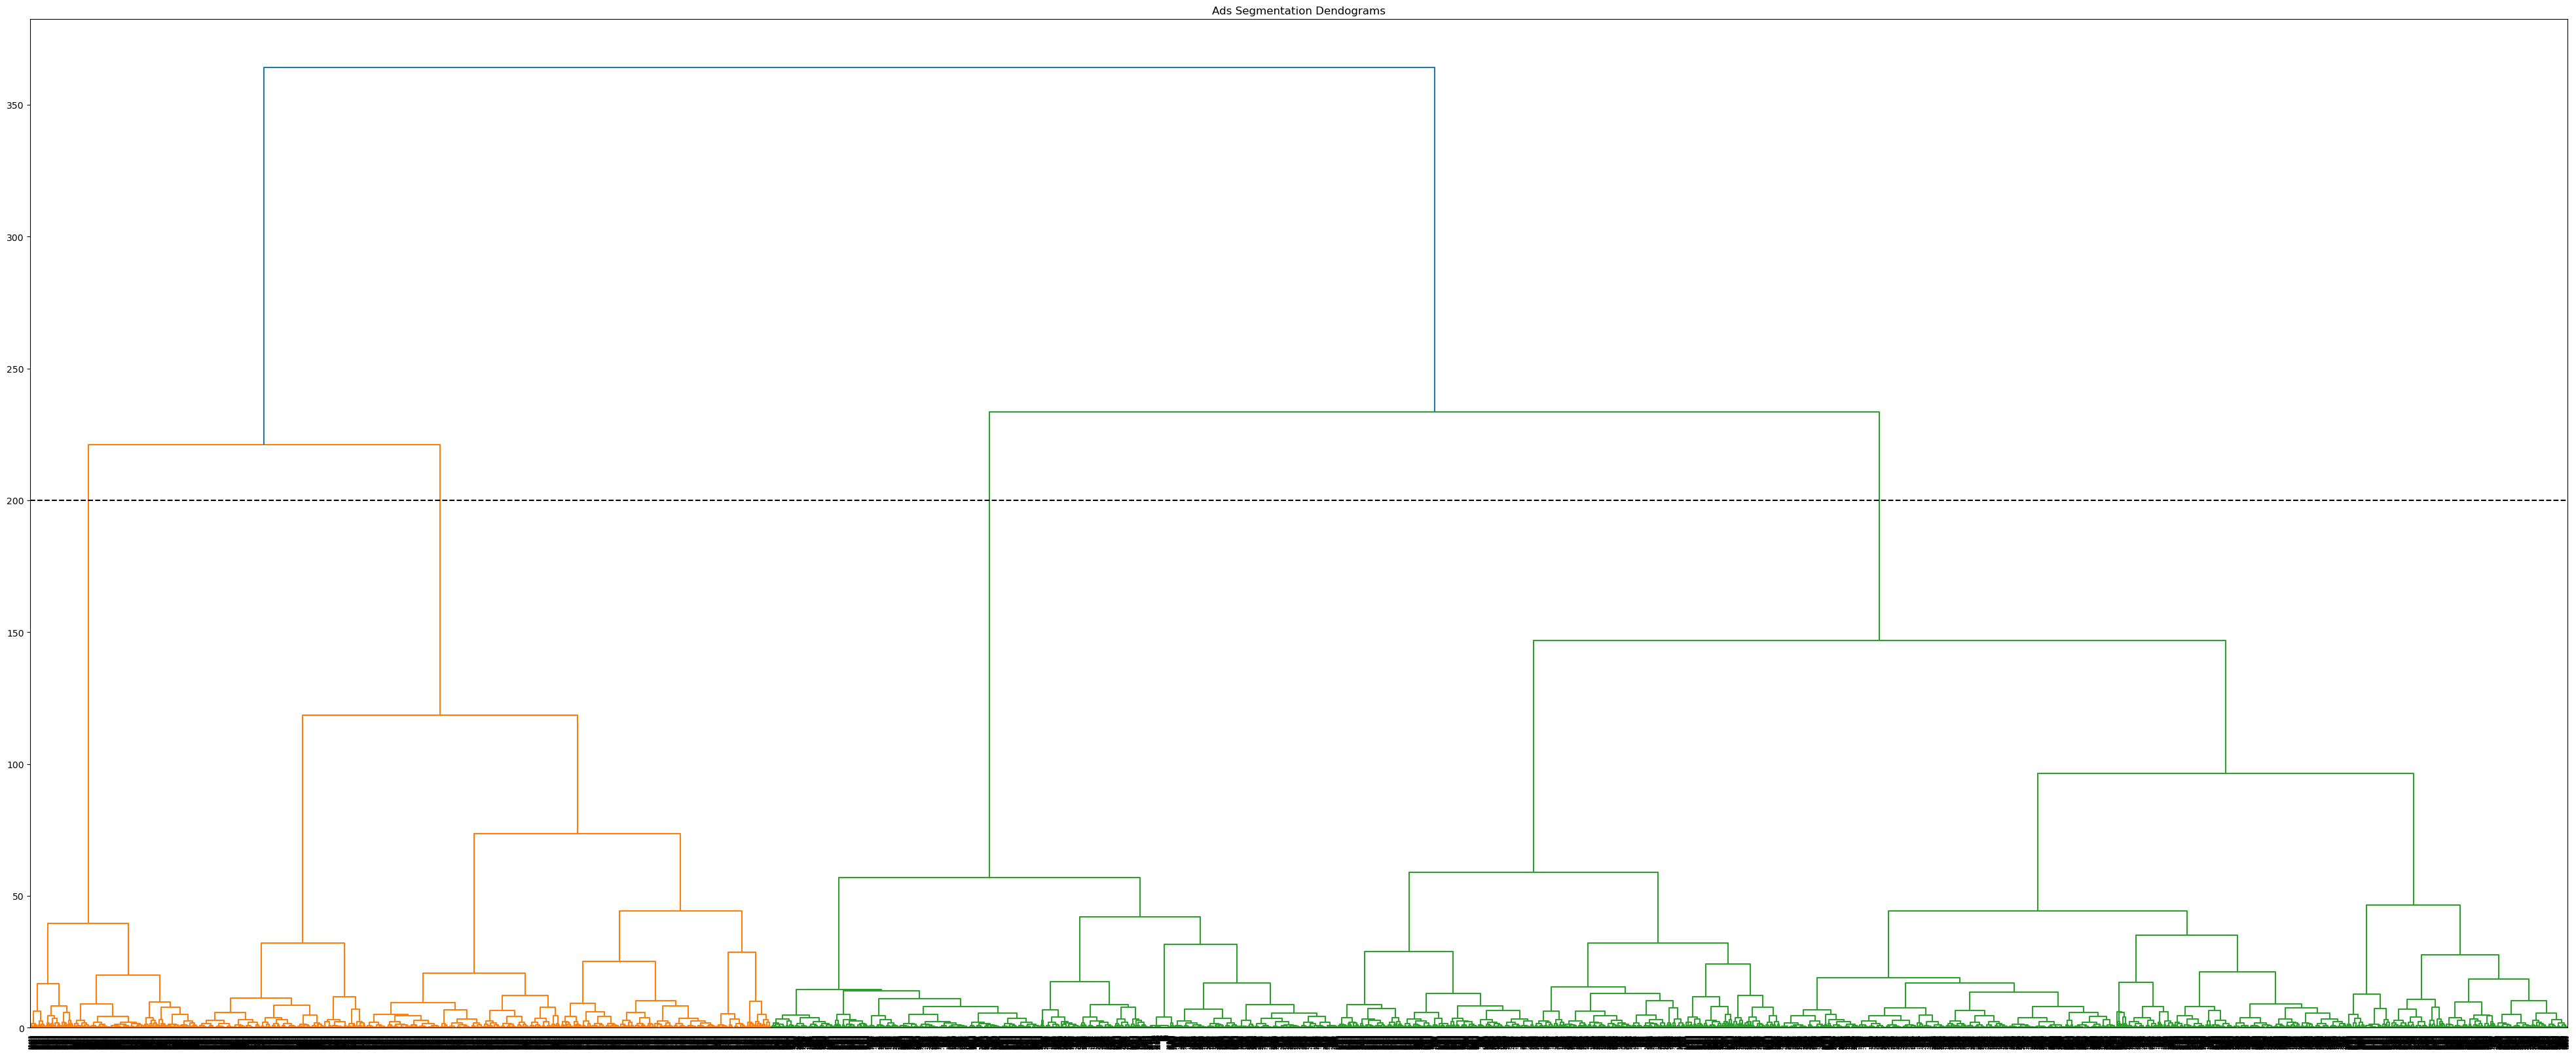

In [38]:
plt.figure(figsize=(50, 20))
plt.title("Ads Segmentation Dendograms")
wardlink = linkage(req_col_scaled , method = 'ward')
dend = dendrogram(wardlink)
plt.axhline(200, color='black', linestyle='--')
plt.show()

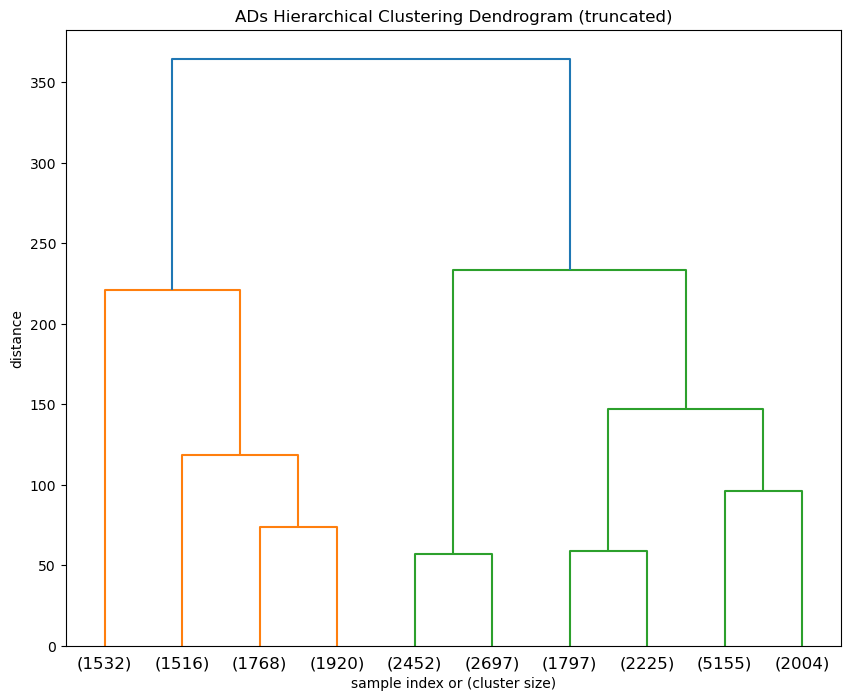

In [43]:
plt.figure(figsize=(10, 8))
Z_Final = linkage(req_col_scaled, 'ward', metric='euclidean')
plt.title('ADs Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
)
plt.show()


In [48]:
from scipy.cluster.hierarchy import fcluster
cluster = fcluster(wardlink, 4, criterion='maxclust')
cluster

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [49]:
cluster_1 = fcluster(wardlink, 130, criterion='distance')
cluster_1

array([3, 3, 3, ..., 5, 5, 5], dtype=int32)

In [52]:
req_col['cluster_1']= cluster
req_col['cluster_2']= cluster_1
req_col.head()

Impressions  Clicks  Spend  Revenue       CTR  CPM  CPC  cluster_1  \
0        323.0     1.0    0.0      0.0  0.309598  0.0  0.0          3   
1        285.0     1.0    0.0      0.0  0.350877  0.0  0.0          3   
2        355.0     1.0    0.0      0.0  0.281690  0.0  0.0          3   
3        495.0     1.0    0.0      0.0  0.202020  0.0  0.0          3   
4        242.0     1.0    0.0      0.0  0.413223  0.0  0.0          3   

   cluster_2  
0          3  
1          3  
2          3  
3          3  
4          3

In [54]:
df1 = req_col.drop(['cluster_2'],axis=1)
df_clust_1 = df1.groupby('cluster_1').mean()
cluster_1_freq = req_col['cluster_1'].value_counts().sort_index()
df_clust_1['cluster count'] = cluster_1_freq
df_clust_1

Impressions        Clicks        Spend      Revenue        CTR  \
cluster_1                                                                    
1          4.794622e+05  30648.780271  6564.723061  4484.346999  13.766813   
2          2.408015e+06   9474.127018  5061.871762  3408.411197   0.216872   
3          6.775011e+05   3261.622063  1233.084003   801.601990   0.447147   
4          5.621284e+04   7025.661278   645.206718   420.065886  14.771011   

                 CPM       CPC  cluster count  
cluster_1                                      
1          15.370316  0.111687           1532  
2           1.628842  0.774428           5204  
3           1.781330  0.452358           5149  
4          13.271419  0.096786          11181

In [55]:
df2 = req_col.drop(['cluster_1'],axis=1)
df_clust_2 = df2.groupby('cluster_2').mean()
cluster_2_freq = req_col['cluster_2'].value_counts().sort_index()
df_clust_2['cluster count'] = cluster_2_freq
df_clust_2

Impressions        Clicks        Spend      Revenue        CTR  \
cluster_2                                                                    
1          4.794622e+05  30648.780271  6564.723061  4484.346999  13.766813   
2          2.408015e+06   9474.127018  5061.871762  3408.411197   0.216872   
3          6.775011e+05   3261.622063  1233.084003   801.601990   0.447147   
4          1.440609e+05  18028.061847  1649.851430  1074.298070  13.146363   
5          6.858915e+03    844.399218    80.786962    52.511501  15.683755   

                 CPM       CPC  cluster count  
cluster_2                                      
1          15.370316  0.111687           1532  
2           1.628842  0.774428           5204  
3           1.781330  0.452358           5149  
4          12.347936  0.094420           4022  
5          13.790241  0.098116           7159

Observation:
1. Lets take cluster_1 for our observation, here we can see that as per Revenue from Ads we see that the cluster 1 has more revenue than other clusters, followed by cluster2 and cluster 3.
2.  cluster 2 has the high CPC(cost per click) and followed by 1 and 3.
3. Even though from cluster 1 we have high clicks, but in CPC it has the 2nd place and being with only 9474 clicks cluster 1 holds maximum CPC.
3. forming the cluster 5 by distance and by wards linkage by 4 clusters both cluster counts shows the same hierarchical clustering.
4. from cluster_1 the 4th cluster has 11181 counts and in cluster_2 has the same 11181 but seperated into 2 clusters counting as one for 4th cluster as 4022 and 5th cluster as 7159.


In [47]:
#Checking the clustering including all the columns

In [39]:
wardlink = linkage(df_scaled , method = 'ward')

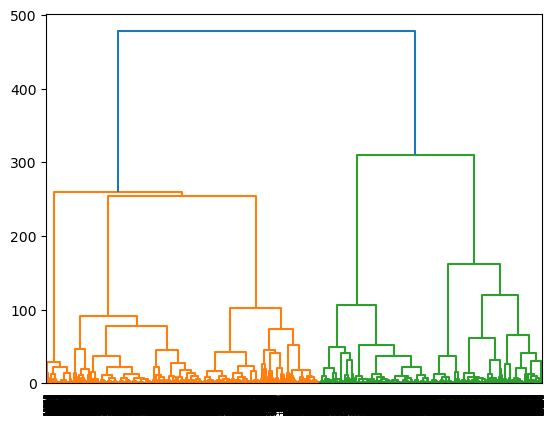

In [40]:
dend = dendrogram(wardlink)

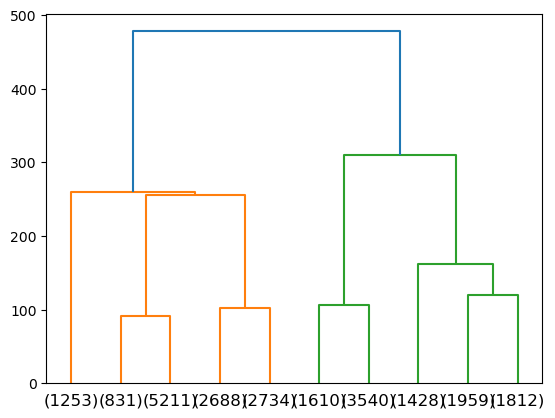

In [63]:
dend = dendrogram(wardlink, truncate_mode= 'lastp', p = 10)

In [41]:
from scipy.cluster.hierarchy import fcluster

In [43]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [44]:
clusters = fcluster(wardlink, 300, criterion='distance')
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [73]:
df['Hier'] = clusters

In [74]:
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  Hier  
0              323       1   0.00  0.35   0.0000    0.309598   0.0  0.00     2  
1              285       1   0.00  0.35   0.0000    0.350877   0.0  0.00     2  
2              355       1   0.00  0.35   0.0000    0.281690   0.0  0.00     2  
3              495       1   0.00  0.35   0.0000    0.202020   0.0  0.00     2  
4              242       1   0.00  0.35   0.0000    0.413223   0.0  0.00     2  
...            ...     ...    ...   ...      ...         ...   ...   ...   ...  
23061            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07     1  
23062            2       1   0.04  0.35   0.0260   50.000000  20.0  0.04     1  
23063            1       1   0.05  0.35   0.0325  100.000000  50.0  0.05     1  
23064            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07     1  
23065            2       1   0.09  0.35   0.0585   50.000000  45.0  0.09     1  

[23066 rows x 20 columns]

In [75]:
df['Hier'].value_counts()

Hier
1    12717
3     5199
2     5150
Name: count, dtype: int64

In [76]:
aggdata=df.iloc[:, 12:20].groupby('Hier').mean()
aggdata['Freq']=df.Hier.value_counts().sort_index()
aggdata

Clicks        Spend       Fee      Revenue        CTR        CPM  \
Hier                                                                           
1     14171.116616  1411.798872  0.342367   975.525601  14.984422  13.842914   
2      3257.836117  1235.015460  0.349973   802.854700   0.446291   1.782975   
3      9486.202924  7331.573814  0.302695  5355.711385   0.217043   1.627056   

           CPC   Freq  
Hier                   
1     0.098631  12717  
2     0.455989   5150  
3     0.800763   5199

In [142]:
df.to_csv('hier.csv')

There are 3 clusters formed to identify.
1 cluster ad's revenue comes medium range
2nd cluster ad's revenue is too less or 0
3rd cluster AD's revenue is high and gives profitable.

Agglometric clustering

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df.iloc[:,12:20])
print(Cluster_agglo)

[2 2 2 ... 2 2 2]


In [79]:
df["Agglo_CLusters"]=Cluster_agglo

In [80]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Hier', 'Agglo_CLusters'],
      dtype='object')

In [81]:
df.drop(['Hier'],axis = 1)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  \
0              323       1   0.00  0.35   0.0000    0.309598   0.0  0.00   
1              285       1   0.00  0.35   0.0000    0.350877   0.0  0.00   
2              355       1   0.00  0.35   0.0000    0.281690   0.0  0.00   
3              495       1   0.00  0.35   0.0000    0.202020   0.0  0.00   
4              242       1   0.00  0.35   0.0000    0.413223   0.0  0.00   
...            ...     ...    ...   ...      ...         ...   ...   ...   
23061            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07   
23062            2       1   0.04  0.35   0.0260   50.000000  20.0  0.04   
23063            1       1   0.05  0.35   0.0325  100.000000  50.0  0.05   
23064            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07   
23065            2       1   0.09  0.35   0.0585   50.000000  45.0  0.09   

       Agglo_CLusters  
0                   2  
1                   2  
2                   2  
3                   2  
4                   2  
...               ...  
23061               2  
23062               2  
23063               2  
23064               2  
23065               2  

[23066 rows x 20 columns]

In [82]:
agglo_data=df.iloc[:, 12:21].groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

Clicks        Spend       Fee      Revenue        CTR  \
Agglo_CLusters                                                                
0               20082.313974  5600.611021  0.319322  4143.320112   9.835600   
1               71535.010712  7457.082158  0.281966  5383.544279  13.822771   
2                3081.200311  1461.621345  0.344049   983.933345   7.556345   

                      CPM       CPC      Hier   Freq  
Agglo_CLusters                                        
0                9.607461  0.289367  1.497919   5045  
1               14.710549  0.106419  1.000000   1307  
2                7.537716  0.368964  1.779945  16714

Part 1: Clustering: K-means Clustering
- Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out the appropriate number of clusters - Cluster Profiling

In [58]:
req_col = req_col.drop(['cluster_1','cluster_2'],axis=1)
req_col

Impressions  Clicks  Spend  Revenue        CTR        CPM   CPC
0            323.0     1.0   0.00   0.0000   0.309598   0.000000  0.00
1            285.0     1.0   0.00   0.0000   0.350877   0.000000  0.00
2            355.0     1.0   0.00   0.0000   0.281690   0.000000  0.00
3            495.0     1.0   0.00   0.0000   0.202020   0.000000  0.00
4            242.0     1.0   0.00   0.0000   0.413223   0.000000  0.00
...            ...     ...    ...      ...        ...        ...   ...
23061          1.0     1.0   0.07   0.0455  33.278766  29.981418  0.07
23062          2.0     1.0   0.04   0.0260  33.278766  20.000000  0.04
23063          1.0     1.0   0.05   0.0325  33.278766  29.981418  0.05
23064          1.0     1.0   0.07   0.0455  33.278766  29.981418  0.07
23065          2.0     1.0   0.09   0.0585  33.278766  29.981418  0.09

[23066 rows x 7 columns]

In [59]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
req_scaled_df = x.fit_transform(req_col)
req_scaled_df

array([[-0.76847752, -0.86748821, -0.89317018, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-0.76851628, -0.86748821, -0.89317018, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.76844487, -0.86748821, -0.89317018, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [-0.76880601, -0.86748821, -0.89314956, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-0.76880601, -0.86748821, -0.89314131, ...,  3.03580766,
         3.16271759, -0.82143521],
       [-0.76880499, -0.86748821, -0.89313307, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

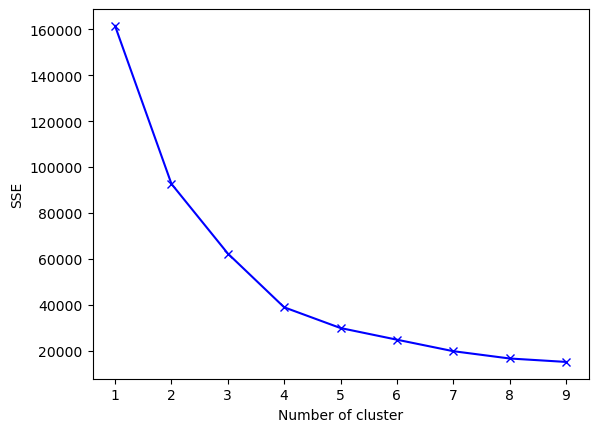

In [62]:
sse = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(req_scaled_df)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [63]:
sse

{1: 161462.0000000003,
 2: 92683.27357027441,
 3: 62345.33141564369,
 4: 38916.13336633178,
 5: 29882.676392274723,
 6: 24811.427150554704,
 7: 19802.1729529365,
 8: 16622.175841221753,
 9: 15126.209101887453}

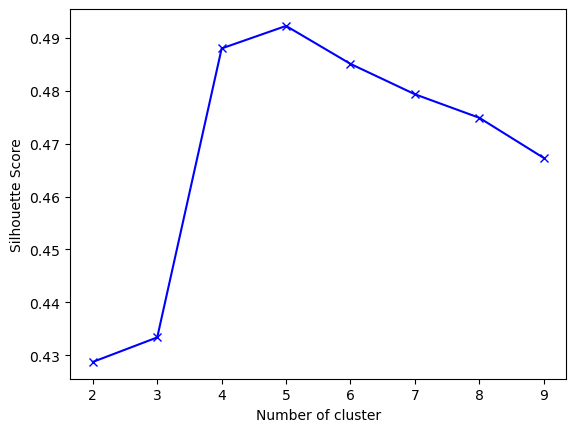

In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=123).fit(req_scaled_df)
    labels = kmeans.predict(req_scaled_df)
    sc[k] = silhouette_score(req_scaled_df, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

we can see from the elbow plot, the silhoutte score varies for first 4 and after that it is normal. so, we can take the first 4 silhoutte values as clusters.

In [107]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(req_scaled_df)

req_col['KMeans_Labels'] = kmeans.predict(req_scaled_df)
req_col['KMeans_Labels'].value_counts()

KMeans_Labels
2    9382
0    6373
3    3991
1    3320
Name: count, dtype: int64

In [100]:
mean = req_col.groupby('KMeans_Labels').mean()
median = req_col.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median','group_3 Median']
df_kmeans.T

group_0 Mean   group_1 Mean  group_2 Mean  group_3 Mean  \
Impressions  835518.604425  327197.604217  29486.242059  2.679809e+06   
Clicks         3271.371881   27176.559375   3760.223726  1.133857e+04   
Spend          1509.693498    4180.513072    361.456632  5.780650e+03   
Revenue         984.210281    2819.890324    234.946788  3.907020e+03   
CTR               0.408366      13.236606     15.163440  2.167270e-01   
CPM               1.788853      13.111672     13.682085  1.575341e+00   
CPC               0.527380       0.098896      0.098452  7.515842e-01   
cluster_4         0.000000       1.000000      2.000000  3.000000e+00   

             group_0 Median  group_1 Median  group_2 Median  group_3 Median  
Impressions   819965.000000   240943.000000     6004.500000    2.769086e+06  
Clicks          3281.000000    30919.375000      643.000000    9.006000e+03  
Spend           1553.590000     2980.305000       63.605000    5.261380e+03  
Revenue         1009.830000     1937.195000       41.340000    3.682960e+03  
CTR                0.395051       13.169397       13.086318    2.235888e-01  
CPM                1.810455       12.066866       12.696056    1.562178e+00  
CPC                0.470521        0.093313        0.093376    7.238719e-01  
cluster_4          0.000000        1.000000        2.000000    3.000000e+00

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [101]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(req_scaled_df)
labels = k_means.labels_

In [102]:
req_col['cluster_4'] = labels
req_col

Impressions  Clicks  Spend  Revenue        CTR        CPM   CPC  \
0            323.0     1.0   0.00   0.0000   0.309598   0.000000  0.00   
1            285.0     1.0   0.00   0.0000   0.350877   0.000000  0.00   
2            355.0     1.0   0.00   0.0000   0.281690   0.000000  0.00   
3            495.0     1.0   0.00   0.0000   0.202020   0.000000  0.00   
4            242.0     1.0   0.00   0.0000   0.413223   0.000000  0.00   
...            ...     ...    ...      ...        ...        ...   ...   
23061          1.0     1.0   0.07   0.0455  33.278766  29.981418  0.07   
23062          2.0     1.0   0.04   0.0260  33.278766  20.000000  0.04   
23063          1.0     1.0   0.05   0.0325  33.278766  29.981418  0.05   
23064          1.0     1.0   0.07   0.0455  33.278766  29.981418  0.07   
23065          2.0     1.0   0.09   0.0585  33.278766  29.981418  0.09   

       KMeans_Labels  cluster_4  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  
...              ...        ...  
23061              2          2  
23062              2          2  
23063              2          2  
23064              2          2  
23065              2          2  

[23066 rows x 9 columns]

In [103]:
df['cluster_4'] = labels
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  ...  Impressions  \
0        Video     Desktop  Display                   1806  ...          323   
1          App      Mobile    Video                   1780  ...          285   
2        Video     Desktop  Display                   2727  ...          355   
3        Video      Mobile    Video                   2430  ...          495   
4          Web     Desktop    Video                   1218  ...          242   
...        ...         ...      ...                    ...  ...          ...   
23061      Web      Mobile    Video                      1  ...            1   
23062      Web     Desktop    Video                      3  ...            2   
23063      App      Mobile    Video                      2  ...            1   
23064    Video      Mobile    Video                      7  ...            1   
23065      App      Mobile    Video                      2  ...            2   

       Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  KMeans_Labels  \
0           1   0.00  0.35   0.0000    0.309598   0.0  0.00              2   
1           1   0.00  0.35   0.0000    0.350877   0.0  0.00              2   
2           1   0.00  0.35   0.0000    0.281690   0.0  0.00              2   
3           1   0.00  0.35   0.0000    0.202020   0.0  0.00              2   
4           1   0.00  0.35   0.0000    0.413223   0.0  0.00              2   
...       ...    ...   ...      ...         ...   ...   ...            ...   
23061       1   0.07  0.35   0.0455  100.000000  70.0  0.07              0   
23062       1   0.04  0.35   0.0260   50.000000  20.0  0.04              0   
23063       1   0.05  0.35   0.0325  100.000000  50.0  0.05              0   
23064       1   0.07  0.35   0.0455  100.000000  70.0  0.07              0   
23065       1   0.09  0.35   0.0585   50.000000  45.0  0.09              0   

       cluster_4  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
23061          2  
23062          2  
23063          2  
23064          2  
23065          2  

[23066 rows x 21 columns]

In [83]:
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(req_scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(req_scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4287268987089801
For n_clusters=3, the silhouette score is 0.4333644700188214
For n_clusters=4, the silhouette score is 0.48801806736022996
For n_clusters=5, the silhouette score is 0.4922823922657351
For n_clusters=6, the silhouette score is 0.48508394565517066
For n_clusters=7, the silhouette score is 0.4794328936475545
For n_clusters=8, the silhouette score is 0.47491419850488004
For n_clusters=9, the silhouette score is 0.4673187312015644
For n_clusters=10, the silhouette score is 0.44554785163289523


The silhouette score ranges from -1 to 1, and here 0.49 is a higher silhouette score indicates better-defined clusters.

In [105]:
df.cluster_4.value_counts().sort_index()

cluster_4
0    6373
1    3320
2    9382
3    3991
Name: count, dtype: int64

In [92]:
df_kmeans = pd.concat([df_cat_1, req_col], axis=0)

In [94]:
clust_profile=df_kmeans.groupby('cluster_4').mean()

In [109]:
#clust_profile=req_col.drop(['Bank'],axis=1)
clust_profile=req_col.groupby('cluster_4').mean()
clust_profile['freq']=req_col.cluster_4.value_counts().sort_index()
clust_profile

Impressions        Clicks        Spend      Revenue        CTR  \
cluster_4                                                                    
0          8.355186e+05   3271.371881  1509.693498   984.210281   0.408366   
1          3.271976e+05  27176.559375  4180.513072  2819.890324  13.236606   
2          2.948624e+04   3760.223726   361.456632   234.946788  15.163440   
3          2.679809e+06  11338.574292  5780.650474  3907.020303   0.216727   

                 CPM       CPC  KMeans_Labels  freq  
cluster_4                                            
0           1.788853  0.527380            0.0  6373  
1          13.111672  0.098896            1.0  3320  
2          13.682085  0.098452            2.0  9382  
3           1.575341  0.751584            3.0  3991

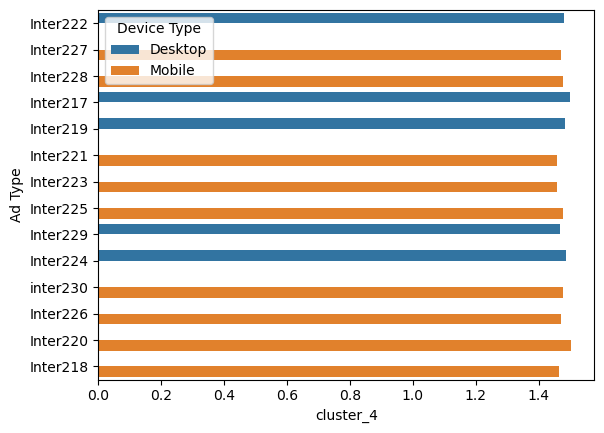

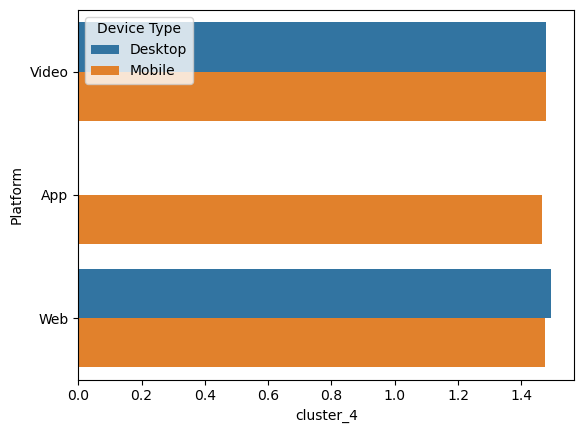

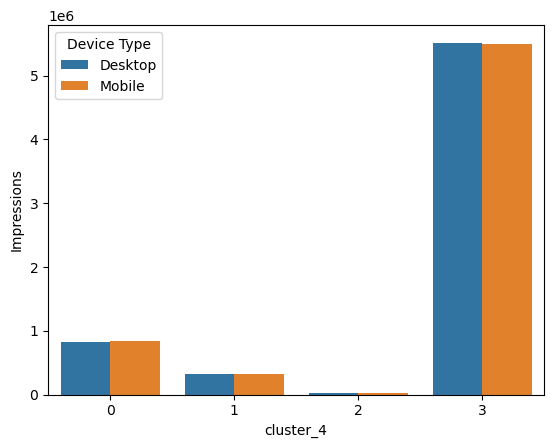

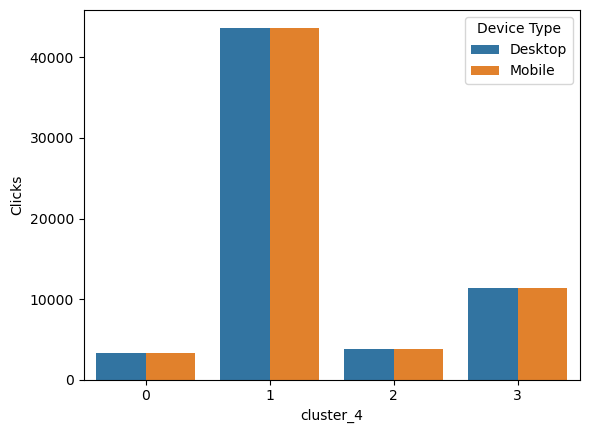

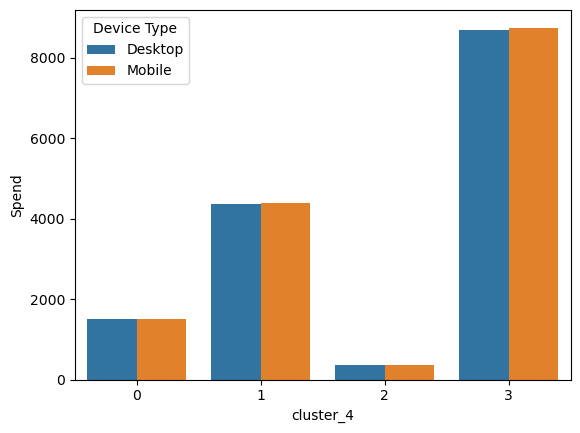

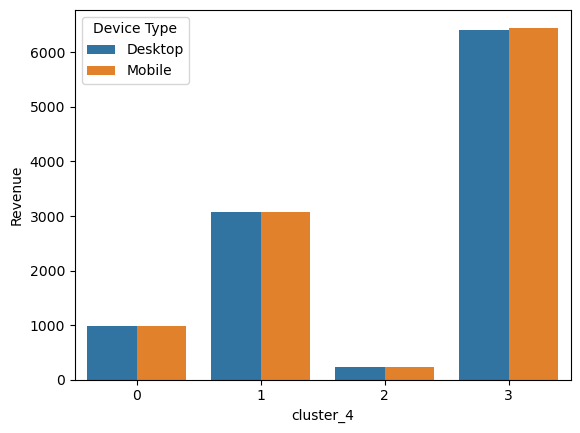

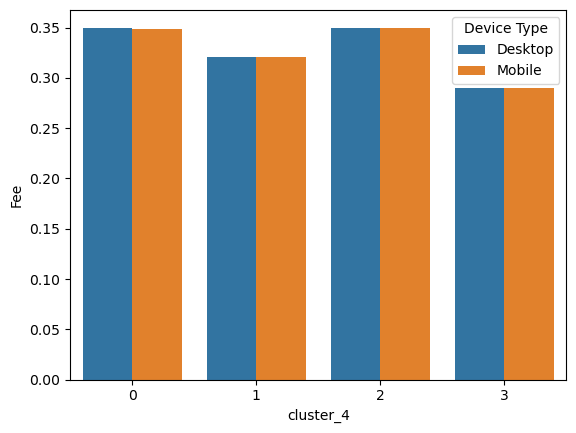

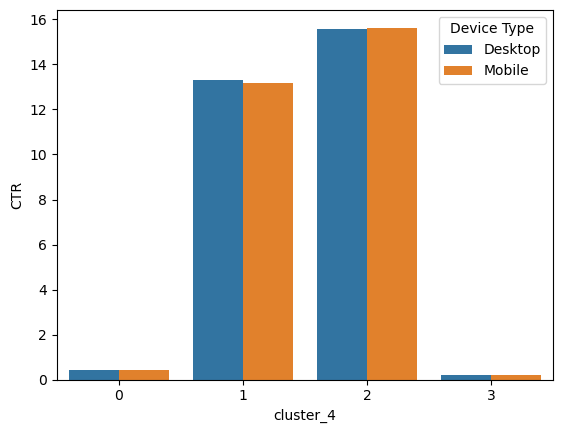

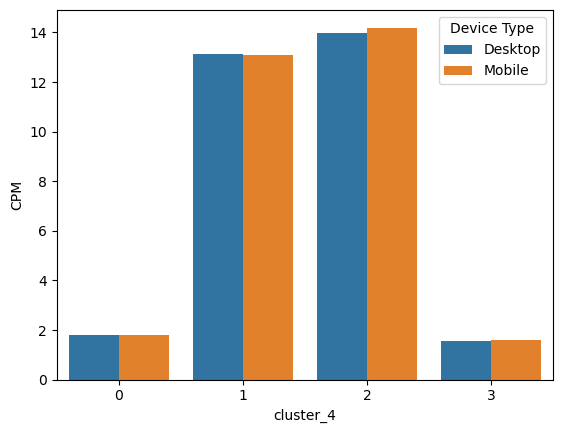

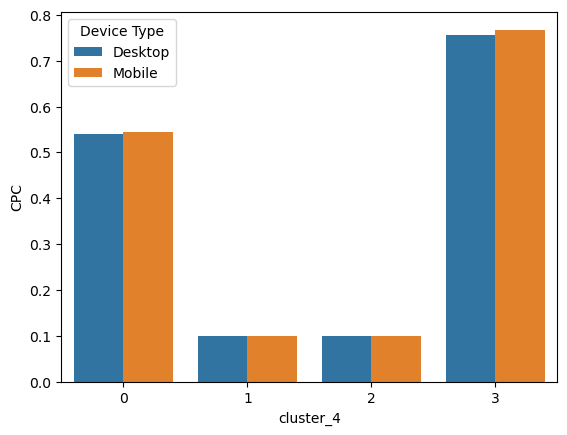

In [122]:
cols_visualise = ['Ad Type', 'Platform', 'Impressions', 'Clicks', 'Spend', 'Revenue', 'Fee', 'CTR','CPM','CPC']

for col in cols_visualise:
    sns.barplot(x = 'cluster_4', y = col, data = df,hue = 'Device Type' ,ci= False)
    plt.show()

Observations:

In [116]:
df.to_csv('K_means_with_4_clusters.csv')

In [137]:
#For whole dataset
df_col

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0            300.0      250.0   75000.0                 1806.0   
1            300.0      250.0   75000.0                 1780.0   
2            300.0      250.0   75000.0                 2727.0   
3            300.0      250.0   75000.0                 2430.0   
4            300.0      250.0   75000.0                 1218.0   
...            ...        ...       ...                    ...   
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
0                325.0        323.0     1.0   0.00  0.35   0.0000   0.309598   
1                285.0        285.0     1.0   0.00  0.35   0.0000   0.350877   
2                356.0        355.0     1.0   0.00  0.35   0.0000   0.281690   
3                497.0        495.0     1.0   0.00  0.35   0.0000   0.202020   
4                242.0        242.0     1.0   0.00  0.35   0.0000   0.413223   
...                ...          ...     ...    ...   ...      ...        ...   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  
0       0.000000  0.00  
1       0.000000  0.00  
2       0.000000  0.00  
3       0.000000  0.00  
4       0.000000  0.00  
...          ...   ...  
23061  29.981418  0.07  
23062  20.000000  0.04  
23063  29.981418  0.05  
23064  29.981418  0.07  
23065  29.981418  0.09  

[23066 rows x 13 columns]

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
x = StandardScaler()

In [166]:
scaled_df = x.fit_transform(df_col)

In [167]:
scaled_df

array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-1.13489073,  1.29058999, -0.29756446, ...,  3.03580766,
         3.16271759, -0.82143521],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

In [177]:
wss = []

In [178]:
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(scaled_df)
    wss.append(km.inertia_)

In [179]:
wss

[299857.99999999866,
 183349.10202886112,
 130878.36307072219,
 95133.94481349873,
 61539.18919785395,
 51676.89230709949,
 44598.25849746805,
 39597.85007020004,
 36061.682345210735,
 33273.142848524236]

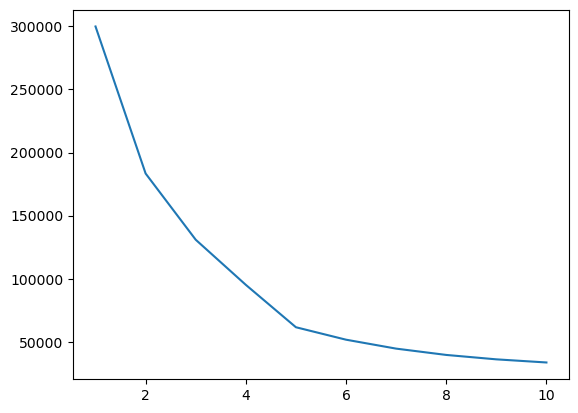

In [151]:
plt.plot(range(1,11),wss)

In [171]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df)
labels = kmeans.labels_

In [172]:
df['K_clus'] = labels

In [154]:
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  ...  Impressions  \
0        Video     Desktop  Display                   1806  ...          323   
1          App      Mobile    Video                   1780  ...          285   
2        Video     Desktop  Display                   2727  ...          355   
3        Video      Mobile    Video                   2430  ...          495   
4          Web     Desktop    Video                   1218  ...          242   
...        ...         ...      ...                    ...  ...          ...   
23061      Web      Mobile    Video                      1  ...            1   
23062      Web     Desktop    Video                      3  ...            2   
23063      App      Mobile    Video                      2  ...            1   
23064    Video      Mobile    Video                      7  ...            1   
23065      App      Mobile    Video                      2  ...            2   

       Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  K_clus  sil_width  
0           1   0.00  0.35   0.0000    0.309598   0.0  0.00       4   0.142638  
1           1   0.00  0.35   0.0000    0.350877   0.0  0.00       4   0.142007  
2           1   0.00  0.35   0.0000    0.281690   0.0  0.00       4   0.143092  
3           1   0.00  0.35   0.0000    0.202020   0.0  0.00       4   0.144273  
4           1   0.00  0.35   0.0000    0.413223   0.0  0.00       4   0.141021  
...       ...    ...   ...      ...         ...   ...   ...     ...        ...  
23061       1   0.07  0.35   0.0455  100.000000  70.0  0.07       2   0.128446  
23062       1   0.04  0.35   0.0260   50.000000  20.0  0.04       2   0.196818  
23063       1   0.05  0.35   0.0325  100.000000  50.0  0.05       2   0.128336  
23064       1   0.07  0.35   0.0455  100.000000  70.0  0.07       3   0.385952  
23065       1   0.09  0.35   0.0585   50.000000  45.0  0.09       2   0.128407  

[23066 rows x 21 columns]

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [126]:
silhouette_score(req_scaled_df, labels)

0.48801437566755546

In [175]:
sil_width = silhouette_samples (scaled_df, labels)

In [158]:
df['sil_width'] = sil_width


In [159]:
df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  ...  Impressions  \
0        Video     Desktop  Display                   1806  ...          323   
1          App      Mobile    Video                   1780  ...          285   
2        Video     Desktop  Display                   2727  ...          355   
3        Video      Mobile    Video                   2430  ...          495   
4          Web     Desktop    Video                   1218  ...          242   
...        ...         ...      ...                    ...  ...          ...   
23061      Web      Mobile    Video                      1  ...            1   
23062      Web     Desktop    Video                      3  ...            2   
23063      App      Mobile    Video                      2  ...            1   
23064    Video      Mobile    Video                      7  ...            1   
23065      App      Mobile    Video                      2  ...            2   

       Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  K_clus  sil_width  
0           1   0.00  0.35   0.0000    0.309598   0.0  0.00       4   0.142638  
1           1   0.00  0.35   0.0000    0.350877   0.0  0.00       4   0.142007  
2           1   0.00  0.35   0.0000    0.281690   0.0  0.00       4   0.143092  
3           1   0.00  0.35   0.0000    0.202020   0.0  0.00       4   0.144273  
4           1   0.00  0.35   0.0000    0.413223   0.0  0.00       4   0.141021  
...       ...    ...   ...      ...         ...   ...   ...     ...        ...  
23061       1   0.07  0.35   0.0455  100.000000  70.0  0.07       2   0.128446  
23062       1   0.04  0.35   0.0260   50.000000  20.0  0.04       2   0.196818  
23063       1   0.05  0.35   0.0325  100.000000  50.0  0.05       2   0.128336  
23064       1   0.07  0.35   0.0455  100.000000  70.0  0.07       3   0.385952  
23065       1   0.09  0.35   0.0585   50.000000  45.0  0.09       2   0.128407  

[23066 rows x 21 columns]

Part 1: Clustering: Actionable Insights & Recommendations
- Extract meaningful insights (atleast 3) from the clusters to identify the most effective types of ads, target audiences, or marketing strategies that can be inferred from each segment. - Based on the clustering analysis and key insights, provide actionable recommendations (atleast 3) to Ads24x7 on how to optimize their digital marketing efforts, allocate budgets efficiently, and tailor ad content to specific audience segments.

Part 2: PCA: Define the problem and perform Exploratory Data Analysis
- Problem Definition - Check shape, Data types, statistical summary - Perform an EDA on the data to extract useful insights Note: 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 2. Example questions to answer from EDA - (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?

In [40]:
db = pd.read_excel('PCA+India+Data_Census.xlsx')

In [128]:
db.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [193]:
db.shape

(640, 61)

In [194]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [195]:
db_cat = db.select_dtypes(include = ['object'])

In [196]:
db_cat.columns

Index(['State', 'Area Name'], dtype='object')

In [150]:
db_num = db.select_dtypes(include = ['int64'])

In [154]:
db_num.columns

Index(['State Code', 'Dist.Code', 'No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06',
       'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL',
       'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M',
       'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F',
       'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M',
       'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F',
       'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F',
       'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F',
       'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F',
       'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F',
       'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F',
       'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [41]:
db.duplicated().sum()

0

In [42]:
db.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

In [201]:
select = db[['MAIN_OT_F', 'MAIN_OT_M','MAINWORK_F','MAINWORK_M','F_ILL','M_ILL','TOT_M','TOT_F' ]]

In [202]:
select.isnull().sum()

MAIN_OT_F     0
MAIN_OT_M     0
MAINWORK_F    0
MAINWORK_M    0
F_ILL         0
M_ILL         0
TOT_M         0
TOT_F         0
dtype: int64

In [203]:
dups = select.duplicated()
print(" no of duplicated rows = %d " % (dups.sum()))
db[dups]

 no of duplicated rows = 0 


Empty DataFrame
Columns: [State Code, Dist.Code, State, Area Name, No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F, MARGWORK_M, MARGWORK_F, MARG_CL_M, MARG_CL_F, MARG_AL_M, MARG_AL_F, MARG_HH_M, MARG_HH_F, MARG_OT_M, MARG_OT_F, MARGWORK_3_6_M, MARGWORK_3_6_F, MARG_CL_3_6_M, MARG_CL_3_6_F, MARG_AL_3_6_M, MARG_AL_3_6_F, MARG_HH_3_6_M, MARG_HH_3_6_F, MARG_OT_3_6_M, MARG_OT_3_6_F, MARGWORK_0_3_M, MARGWORK_0_3_F, MARG_CL_0_3_M, MARG_CL_0_3_F, MARG_AL_0_3_M, MARG_AL_0_3_F, MARG_HH_0_3_M, MARG_HH_0_3_F, MARG_OT_0_3_M, MARG_OT_0_3_F, NON_WORK_M, NON_WORK_F]
Index: []

[0 rows x 61 columns]

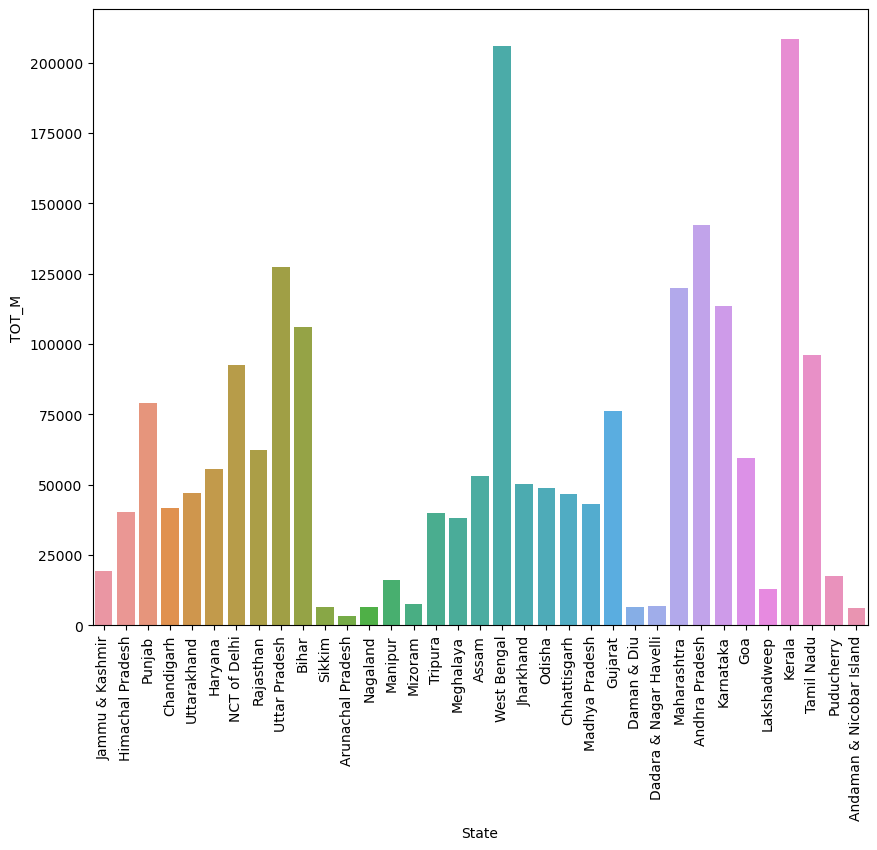

In [182]:
plt.figure(figsize= (10,8))
plt.xticks(rotation=90)
sns.barplot(data =db, x = 'State', y = 'TOT_M', ci = False, );

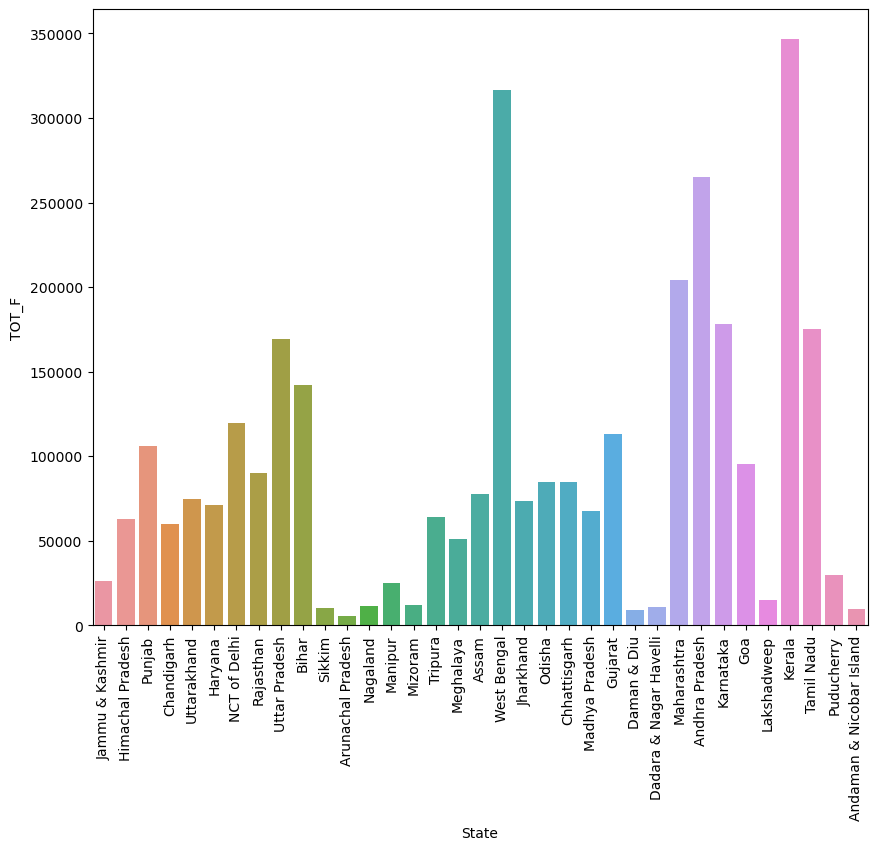

In [184]:
plt.figure(figsize= (10,8))
plt.xticks(rotation=90)
sns.barplot(data =db, x = 'State', y = 'TOT_F', ci = False, );

In [130]:
def calculate_none(x):
    male = db.TOT_M
    female = db.TOT_F
    none = (male/female)*100
    return none

In [131]:
db['Gen_ratio'] = None

In [132]:
db['Gen_ratio'] = db[['Gen_ratio']].apply(lambda x: calculate_none(x))

In [133]:
db['Gen_ratio']

0      78.493758
1      84.776210
2      59.704487
3      66.191155
4      68.680164
         ...    
635    69.213140
636    56.917616
637    58.897338
638    64.902646
639    66.358247
Name: Gen_ratio, Length: 640, dtype: float64

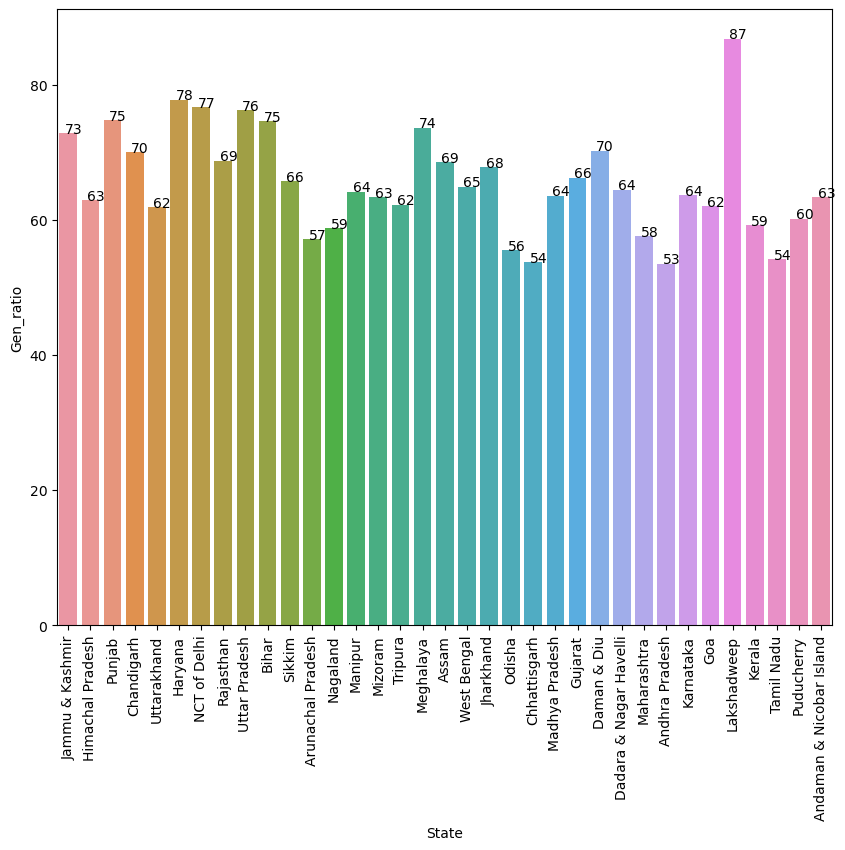

In [12]:
plt.figure(figsize= (10,8))
plt.xticks(rotation=90)
ax = sns.barplot(data =db, x = 'State', y = 'Gen_ratio', ci = False);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
              
plt.show()

In [266]:
db.groupby(['State'])['Gen_ratio'].sum().sort_values(ascending = True).head(5)

State
Dadara & Nagar Havelli     64.463115
Chandigarh                 70.003689
Lakshadweep                86.806120
Goa                       124.031627
Daman & Diu               140.438180
Name: Gen_ratio, dtype: float64

Dadara & Nagar Havelli has the lowest Gender Ratio

In [268]:
db.groupby(['State'])['Gen_ratio'].sum().sort_values(ascending = False).head(5)

State
Uttar Pradesh     5413.293725
Madhya Pradesh    3177.569569
Bihar             2835.917984
Rajasthan         2268.909574
Maharashtra       2013.783018
Name: Gen_ratio, dtype: float64

Uttar Pradesh state has the highest gender ratio in India

In [233]:
db['Gen_ratio'].min()

43.79722581179062

In [234]:
db['Gen_ratio'].max()

86.80611968589223

In [262]:
db.groupby(['Dist.Code'])['Gen_ratio'].sum().sort_values(ascending = True).head(5)

Dist.Code
547    43.797226
398    44.076873
625    44.935161
546    45.007568
391    45.145505
Name: Gen_ratio, dtype: float64

In [122]:
db.iloc[:, :4].join(db.iloc[:, -1:])[db['Dist.Code'] == 547]

State Code  Dist.Code           State Area Name  Gen_ratio
546          28        547  Andhra Pradesh   Krishna  43.797226

district code 547 named Krishna in Andhra pradesh has the lowest Gender ratio.

In [263]:
db.groupby(['Dist.Code'])['Gen_ratio'].sum().sort_values(ascending = False).head(5)

Dist.Code
587    86.806120
2      84.776210
144    84.731286
106    84.691142
139    84.400265
Name: Gen_ratio, dtype: float64

In [121]:
db.iloc[:, :4].join(db.iloc[:, -1:])[db['Dist.Code'] == 587]

State Code  Dist.Code        State    Area Name  Gen_ratio
586          31        587  Lakshadweep  Lakshadweep   86.80612

Lakshadweep district has the highest Gender ratio

Part 2: PCA: Data Preprocessing
- Check for and treat (if needed) missing values - Check for and treat (if needed) data irregularities - Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers

In [19]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Now you can check for missing values in all columns
missing_values = db.isnull().sum()

# Display the result
print(missing_values)

# Reset display options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

     

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


In [134]:
dups = db.duplicated()
print(" no of duplicated rows = %d " % (dups.sum()))
db[dups]

 no of duplicated rows = 0 


Empty DataFrame
Columns: [State Code, Dist.Code, State, Area Name, No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F, MARGWORK_M, MARGWORK_F, MARG_CL_M, MARG_CL_F, MARG_AL_M, MARG_AL_F, MARG_HH_M, MARG_HH_F, MARG_OT_M, MARG_OT_F, MARGWORK_3_6_M, MARGWORK_3_6_F, MARG_CL_3_6_M, MARG_CL_3_6_F, MARG_AL_3_6_M, MARG_AL_3_6_F, MARG_HH_3_6_M, MARG_HH_3_6_F, MARG_OT_3_6_M, MARG_OT_3_6_F, MARGWORK_0_3_M, MARGWORK_0_3_F, MARG_CL_0_3_M, MARG_CL_0_3_F, MARG_AL_0_3_M, MARG_AL_0_3_F, MARG_HH_0_3_M, MARG_HH_0_3_F, MARG_OT_0_3_M, MARG_OT_0_3_F, NON_WORK_M, NON_WORK_F, Gen_ratio]
Index: []

[0 rows x 62 columns]

In [28]:
db.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  310450.000000  485417.000000  750392.000000   

               M_06          F_06           M_SC           F_SC          M_ST  \
count    640.000000    640.000000     640.000000     640.000000    640.000000   
mean   12309.098438  11942.300000   13820.946875   20778.392188   6191.807813   
std    11500.906881  11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000     56.000000       0.000000       0.000000      0.000000   
25%     4733.750000   4672.250000    3466.250000    5603.250000    293.750000   
50%     9159.000000   8663.000000    9591.500000   13709.000000   2333.500000   
75%    16520.250000  15902.250000   19429.750000   29180.000000   7658.000000   
max    96223.000000  95129.000000  103307.000000  156429.000000  96785.000000   

       ...  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    2757.050000     250.889062     558.098438     560.690625   
std    ...    2788.776676     453.336594    1117.642748     762.578991   
min    ...      30.000000       0.000000       0.000000       0.000000   
25%    ...     957.250000      47.000000     109.000000     136.500000   
50%    ...    1928.000000     114.500000     247.500000     308.000000   
75%    ...    3599.750000     270.750000     568.750000     642.000000   
max    ...   21611.000000    5775.000000   17153.000000    6116.000000   

       MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F   NON_WORK_M    NON_WORK_F  \
count     640.000000     640.000000     640.000000   640.000000    640.000000   
mean     1293.431250      71.379688     200.742188   510.014063    704.778125   
std      1585.377936     107.897627     309.740854   610.603187    910.209225   
min         0.000000       0.000000       0.000000     0.000000      5.000000   
25%       298.000000      14.000000      43.000000   161.000000    220.500000   
50%       717.000000      35.000000     113.000000   326.000000    464.500000   
75%      1710.750000      79.000000     240.000000   604.500000    853.500000   
max     13714.000000     895.000000    3354.000000  6456.000000  10533.000000   

        Gen_ratio  
count  640.000000  
mean    65.698884  
std      9.159831  
min     43.797226  
25%     58.673443  
50%     65.879589  
75%     73.022995  
max     86.806120  

[8 rows x 60 columns]

In [127]:
lists = db.columns
for i in range(len(lists)):
    every_colum = db[lists[i]].unique()
    print(every_colum ,'\n')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35] 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 2

In [135]:
dbs = db.drop(['State', 'Area Name'],axis=1)

In [136]:
dbs

State Code  Dist.Code  No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  \
0             1          1   7707  23388  29796  5862  6196     3     0  1999   
1             1          2   6218  19585  23102  4482  3733     7     6   427   
2             1          3   4452   6546  10964  1082  1018     3     6  5806   
3             1          4   1320   2784   4206   563   677     0     0  2666   
4             1          5  11654  20591  29981  5157  4587    20    33  7670   
..          ...        ...    ...    ...    ...   ...   ...   ...   ...   ...   
635          34        636   3333   8154  11781  1146  1203    21    30     0   
636          34        637  10612  12346  21691  1544  1533  2234  4155     0   
637          35        638   1275   1549   2630   227   225     0     0  1012   
638          35        639   3762   5200   8012   723   664     0     0    28   
639          35        640   7975  11977  18049  1470  1358     0     0   161   

     ...  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0    ...            749            180            237            680   
1    ...            715            123            229            186   
2    ...            188             44             89              3   
3    ...            247             61            128             13   
4    ...           1928            465           1043            205   
..   ...            ...            ...            ...            ...   
635  ...             47              0              0              0   
636  ...            337              3             14             38   
637  ...            134              9              4              2   
638  ...            172             24             44             11   
639  ...            122              6              2             17   

     MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  \
0              252             32             46         258         214   
1              148             76            178         140         160   
2               34              0              4          67          61   
3               50              4             10         116          59   
4              302             24            105         180         478   
..             ...            ...            ...         ...         ...   
635              0              0              0          32          47   
636            130              4             23         110         170   
637              6             17             47          76          77   
638             21              1              4         100         103   
639             17              2              4         148          99   

     Gen_ratio  
0    78.493758  
1    84.776210  
2    59.704487  
3    66.191155  
4    68.680164  
..         ...  
635  69.213140  
636  56.917616  
637  58.897338  
638  64.902646  
639  66.358247  

[640 rows x 60 columns]

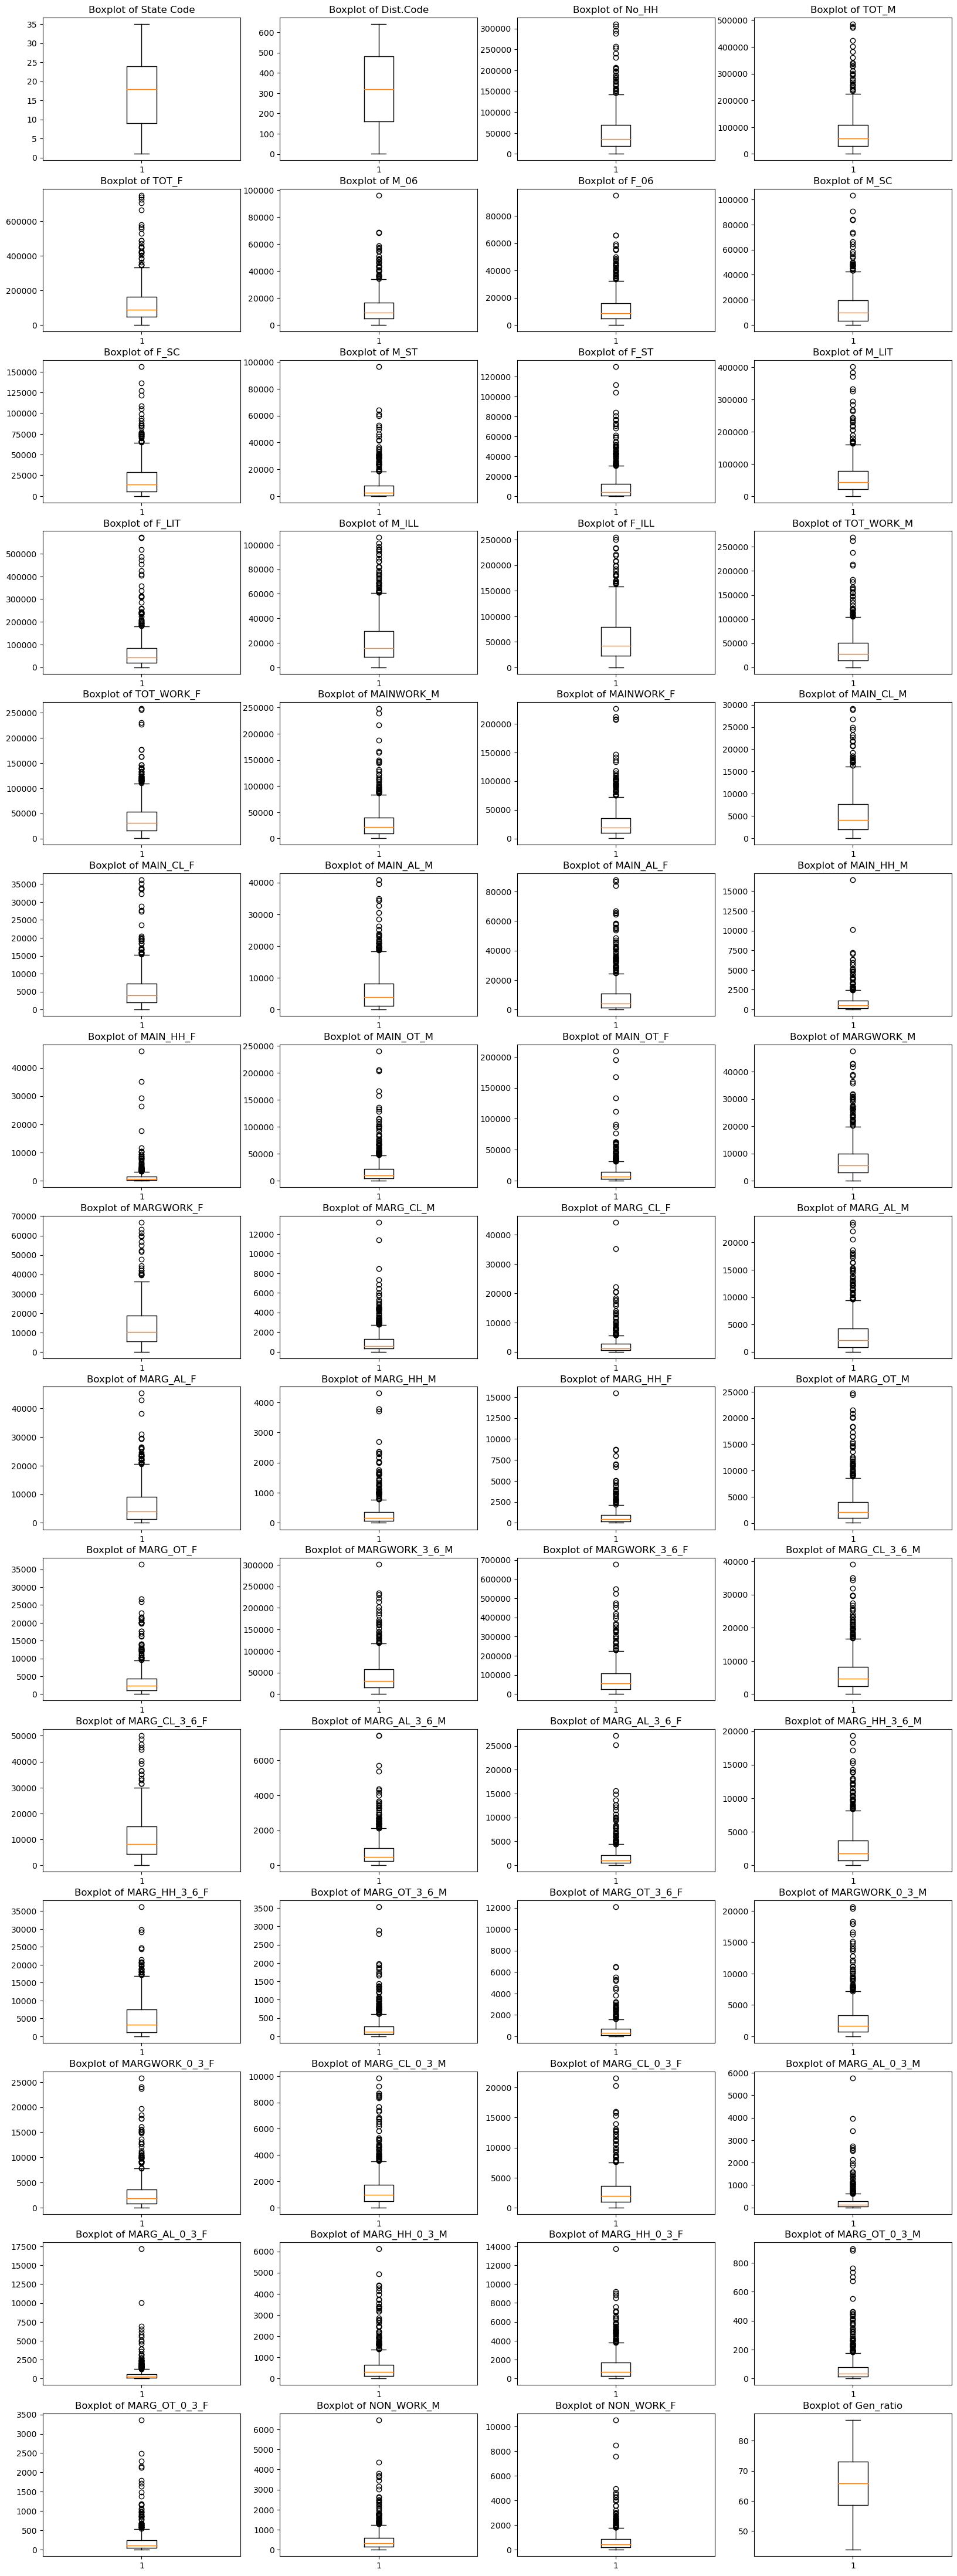

In [130]:
plt.figure(figsize=(20, 60))
plots_list = dbs.columns
for i in range(len(plots_list)):
    plt.subplot(16,4, i+1)
    plt.boxplot( dbs[plots_list[i]])
    plt.title('Boxplot of {}'.format(plots_list[i]))
    

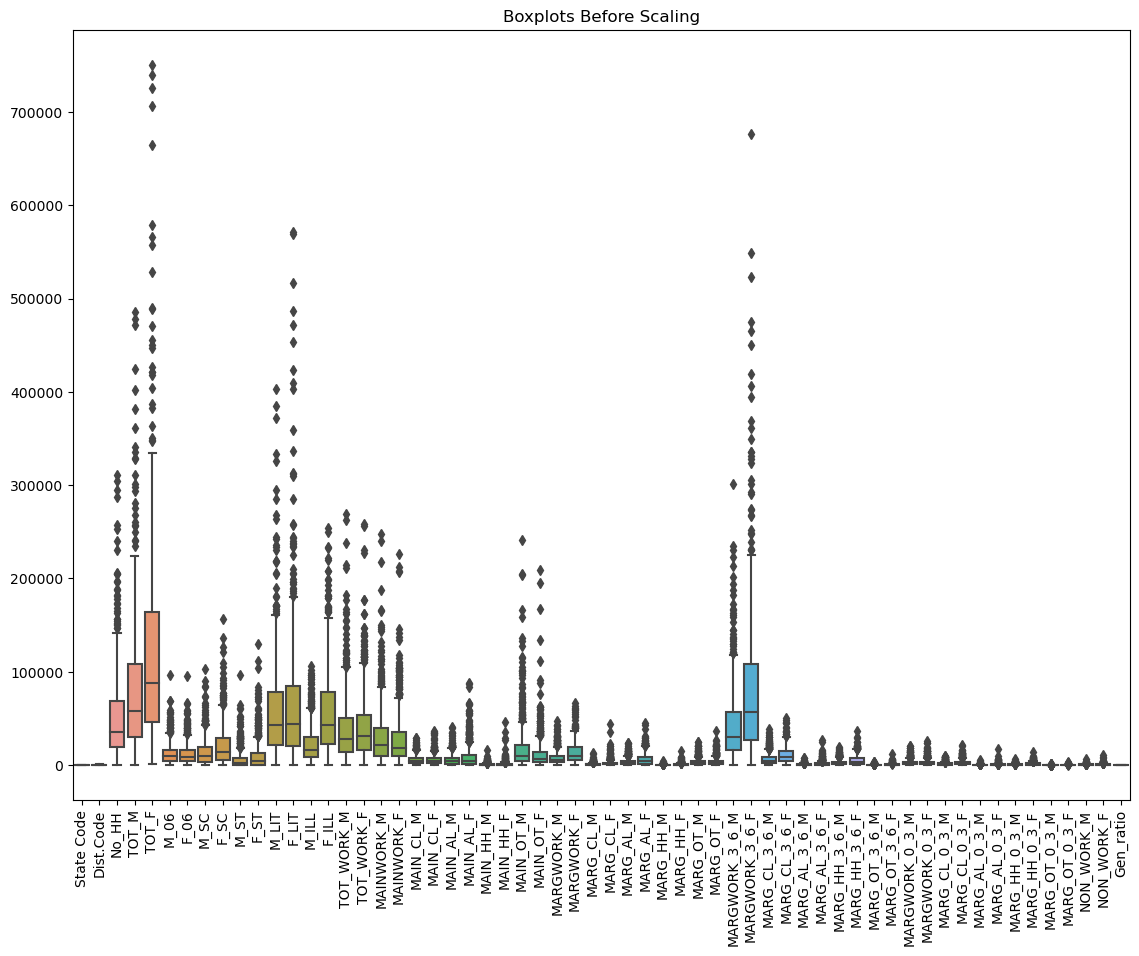

In [61]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=dbs)
plt.title('Boxplots Before Scaling')
plt.xticks(rotation=90);

In [137]:
dbs.drop(['Gen_ratio'],axis=1,inplace=True)

In [138]:
from scipy.stats import zscore


In [139]:
dbs_scaled = dbs.apply(zscore)

In [140]:
dbs_scaled.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738   
1   -1.710782  -1.723934 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367   
2   -1.710782  -1.718521 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262   
3   -1.710782  -1.713109 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393   
4   -1.710782  -1.707696 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.958575 -0.957049 -0.423306  ...      -0.163229      -0.720610   
1 -0.958297 -0.956772 -0.582014  ...      -0.583103      -0.732811   
2 -0.958575 -0.956772 -0.038951  ...      -0.859212      -0.921931   
3 -0.958783 -0.957049 -0.355965  ...      -0.805468      -0.900758   
4 -0.957395 -0.955529  0.149238  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 59 columns]

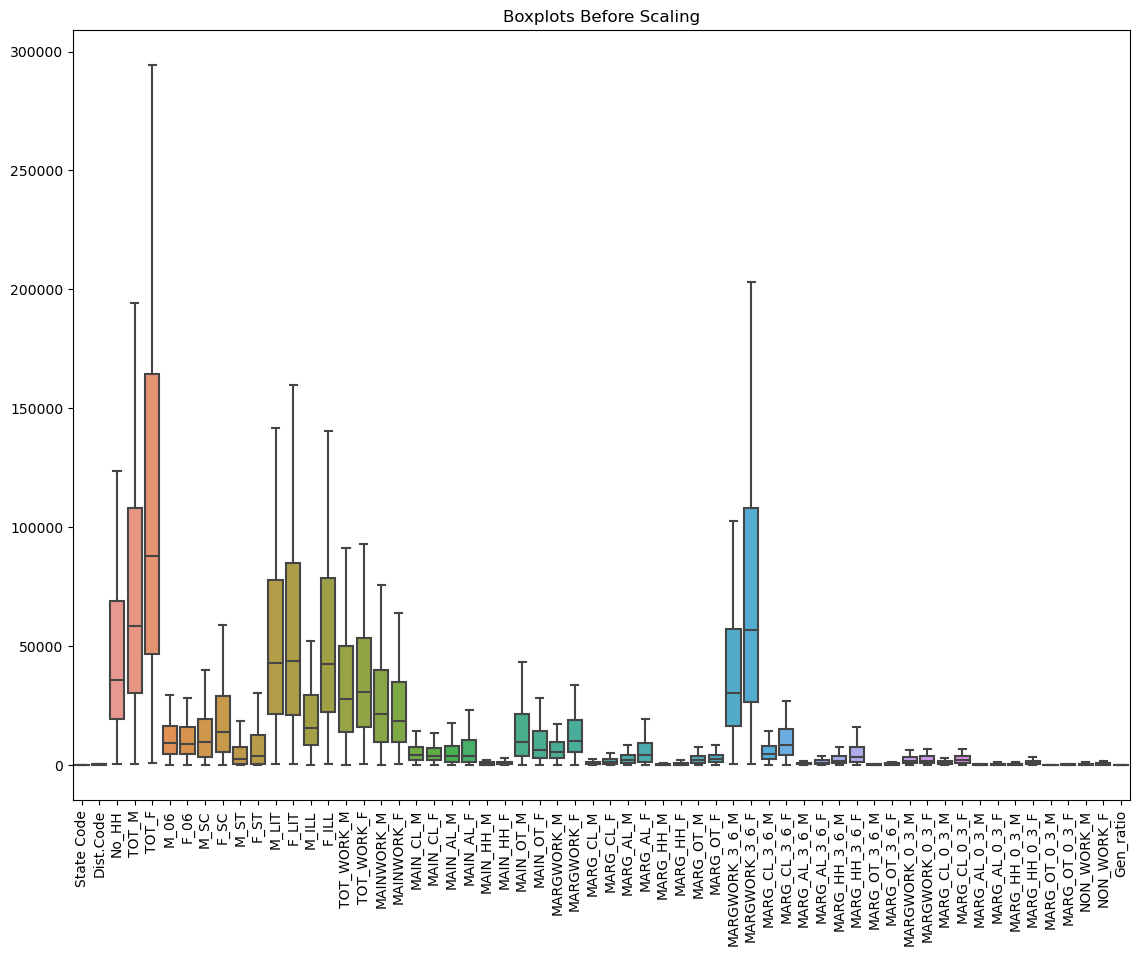

In [118]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=dbs)
plt.title('Boxplots Before Scaling')
plt.xticks(rotation=90);

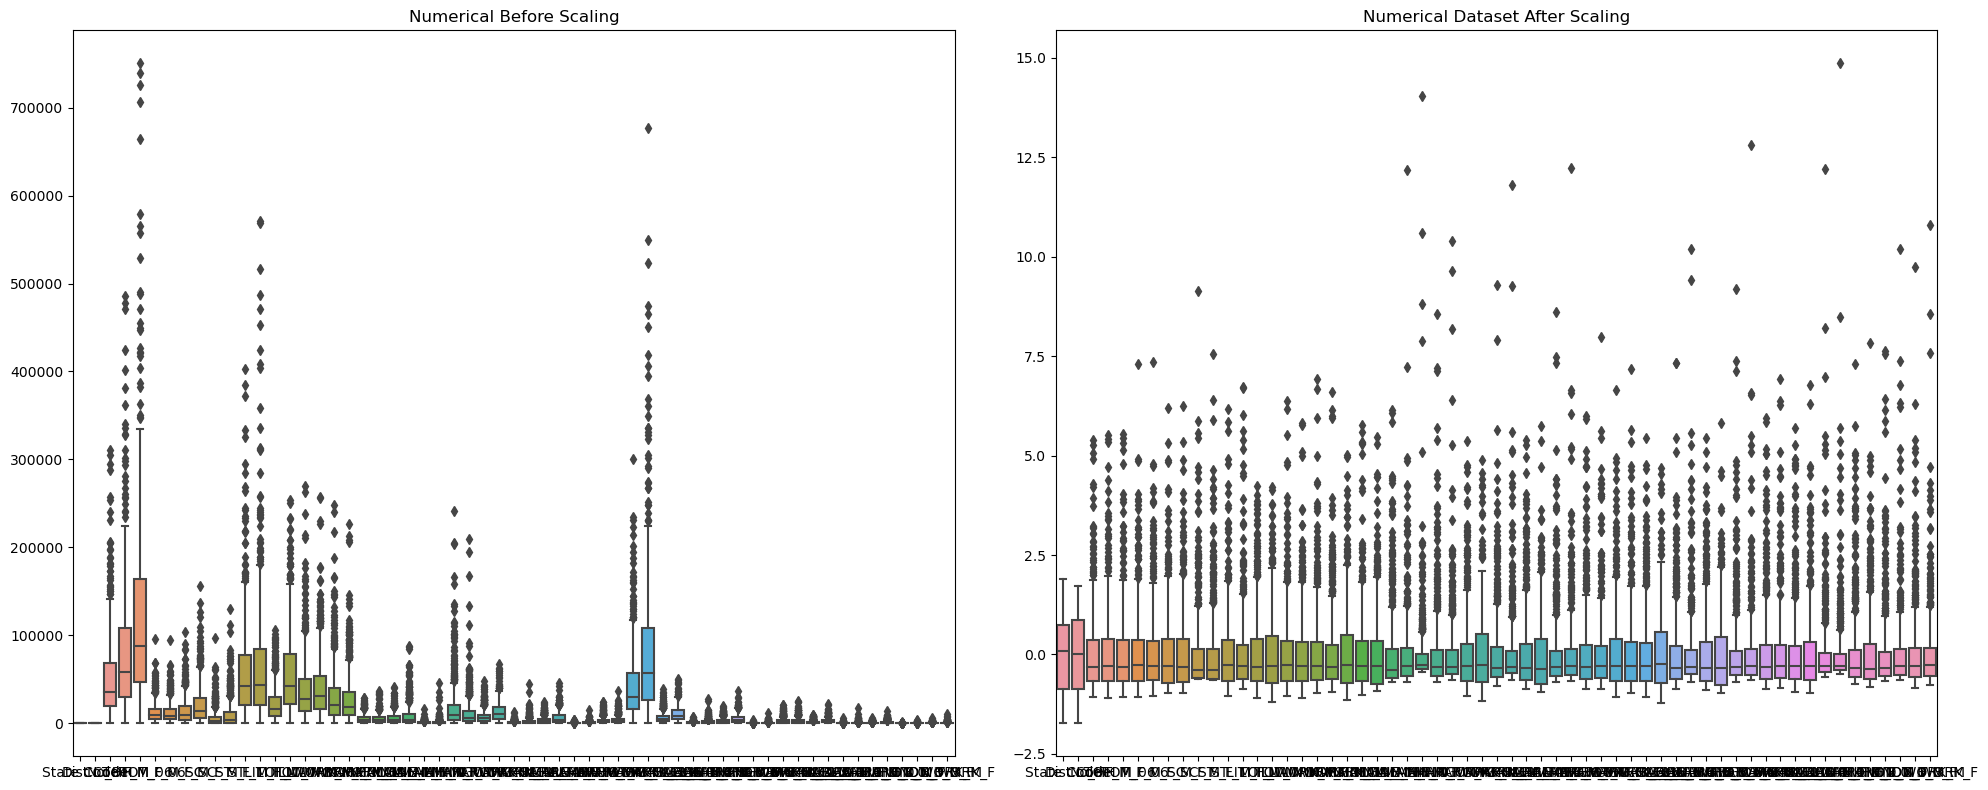

In [210]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=dbs)
plt.title('Numerical Before Scaling')

# After scaling
dbs_scaled = dbs.apply(zscore)

plt.subplot(1, 2, 2)
sns.boxplot(data=dbs_scaled)
plt.title('Numerical Dataset After Scaling')

plt.tight_layout()
plt.show()

even after normalizing the data using zscore technique the outliers are still present but the data in all columns are stable to one another..

Part 2; PCA: PCA
- Create the covariance matrix - Get eigen values and eigen vectors - Identify the optimum number of PCs - Show Scree plot - Compare PCs with Actual Columns and identify which is explaining most variance - Write inferences about all the PCs in terms of actual variables - Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.

In [142]:
data = pd.DataFrame(dbs_scaled[['No_HH','TOT_M','TOT_F','M_LIT','F_LIT','M_ILL']])

# Calculate the covariance matrix
cov_matrix = data.cov()

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
          No_HH     TOT_M     TOT_F     M_LIT     F_LIT     M_ILL
No_HH  1.001565  0.917604  0.972109  0.933397  0.929539  0.764235
TOT_M  0.917604  1.001565  0.984178  0.990860  0.933166  0.912965
TOT_F  0.972109  0.984178  1.001565  0.986983  0.958510  0.859542
M_LIT  0.933397  0.990860  0.986983  1.001565  0.969471  0.843152
F_LIT  0.929539  0.933166  0.958510  0.969471  1.001565  0.720107
M_ILL  0.764235  0.912965  0.859542  0.843152  0.720107  1.001565


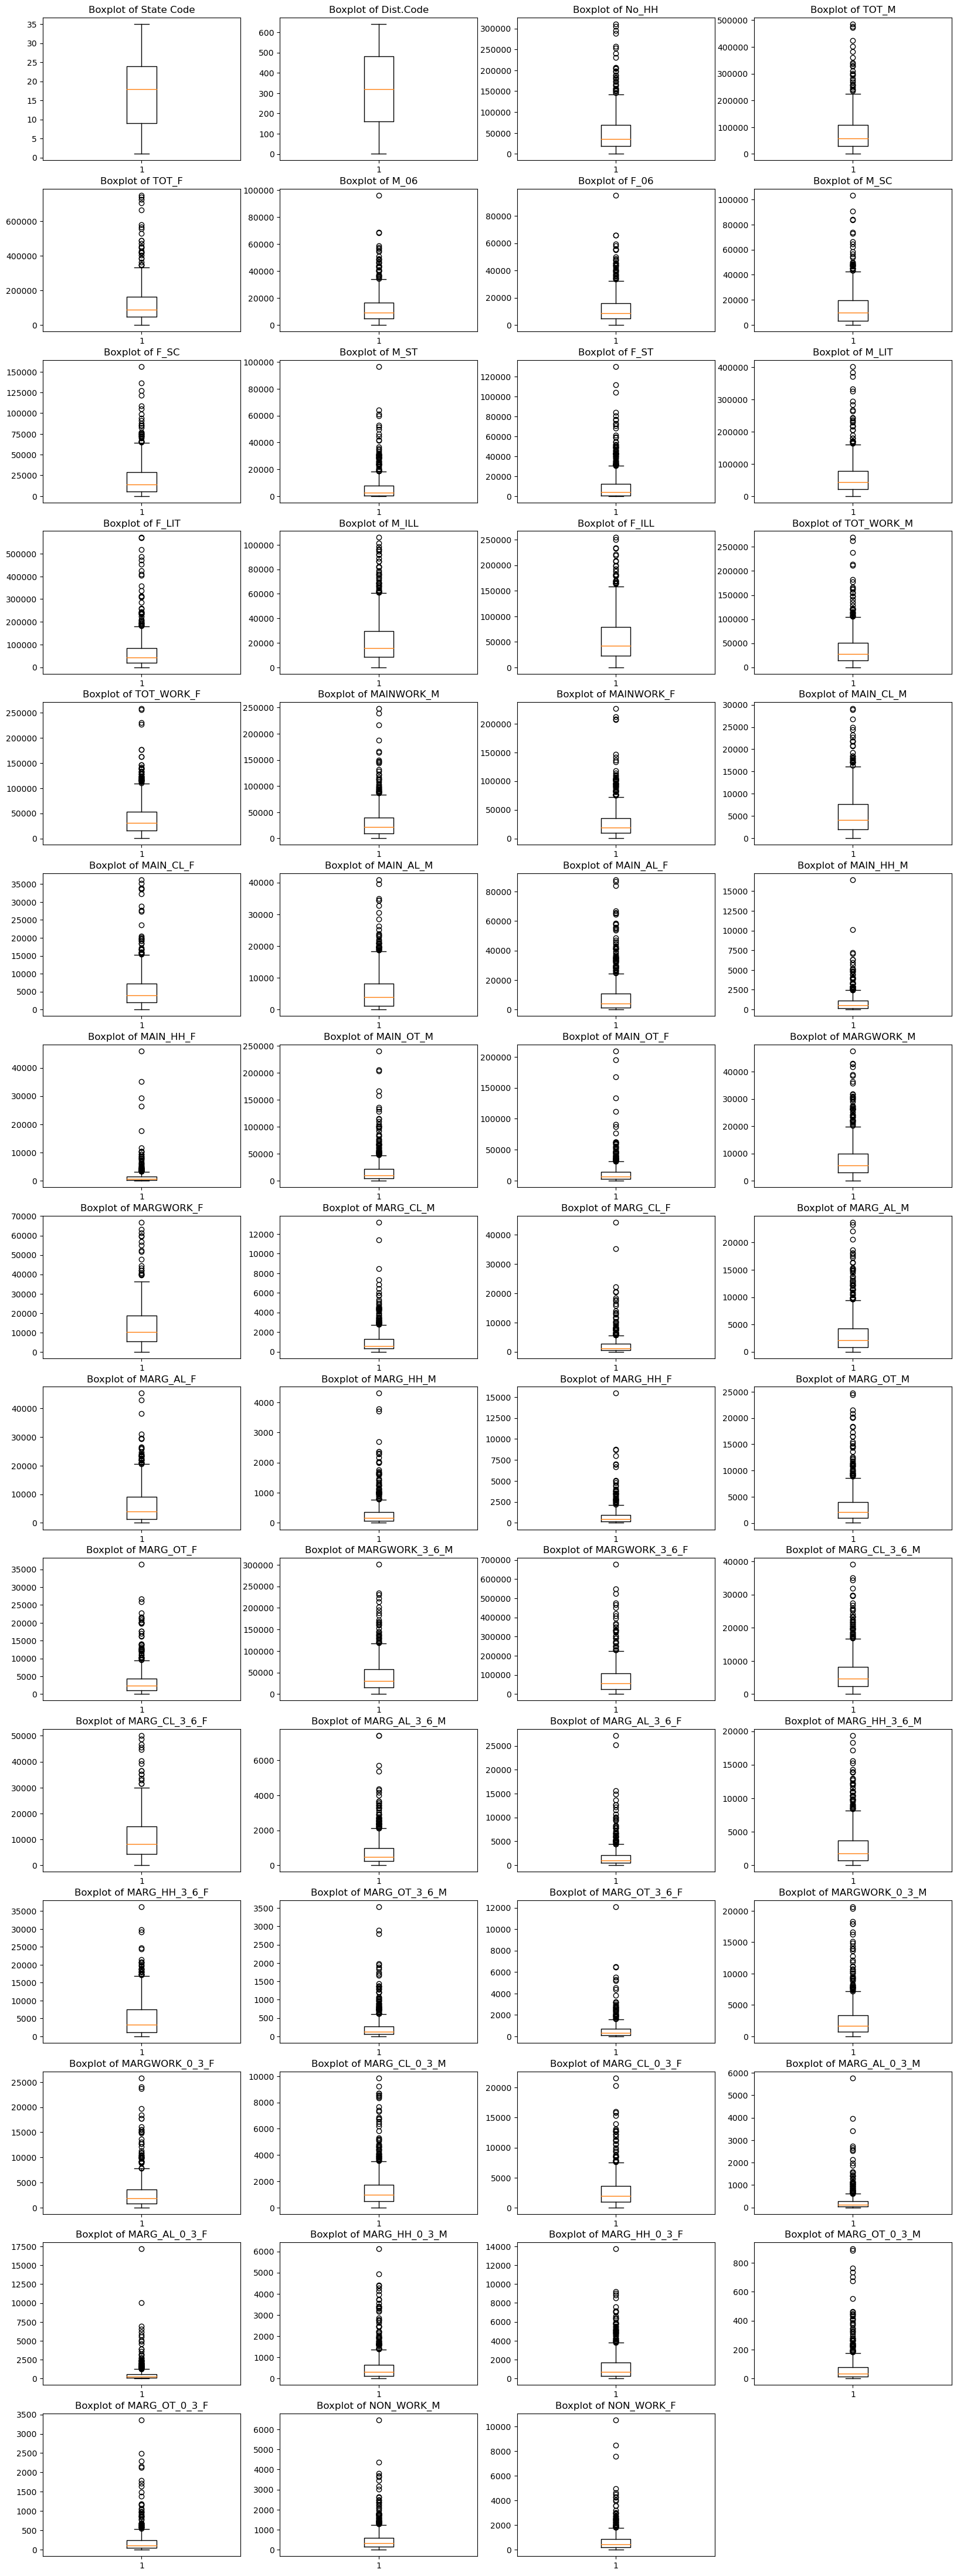

In [137]:
plt.figure(figsize=(20, 60))
plots_list = dbs.columns
for i in range(len(plots_list)):
    plt.subplot(16,4, i+1)
    plt.boxplot( dbs[plots_list[i]])
    plt.title('Boxplot of {}'.format(plots_list[i]))

In [212]:
def remove_outlier(col):
    q1,q3 = col.quantile([0.25,0.75])
    IQR = q3-q1
    lower_range = IQR-(1.5*IQR)
    upper_range = IQR+(1.5*IQR)
    return lower_range, upper_range

In [213]:
for i in plots_list:
    ll, ul = remove_outlier(dbs[i])
    dbs[i] = np.where(dbs[i] > ul, ul, dbs[i])
    dbs[i] = np.where(dbs[i] < ll, ll, dbs[i])

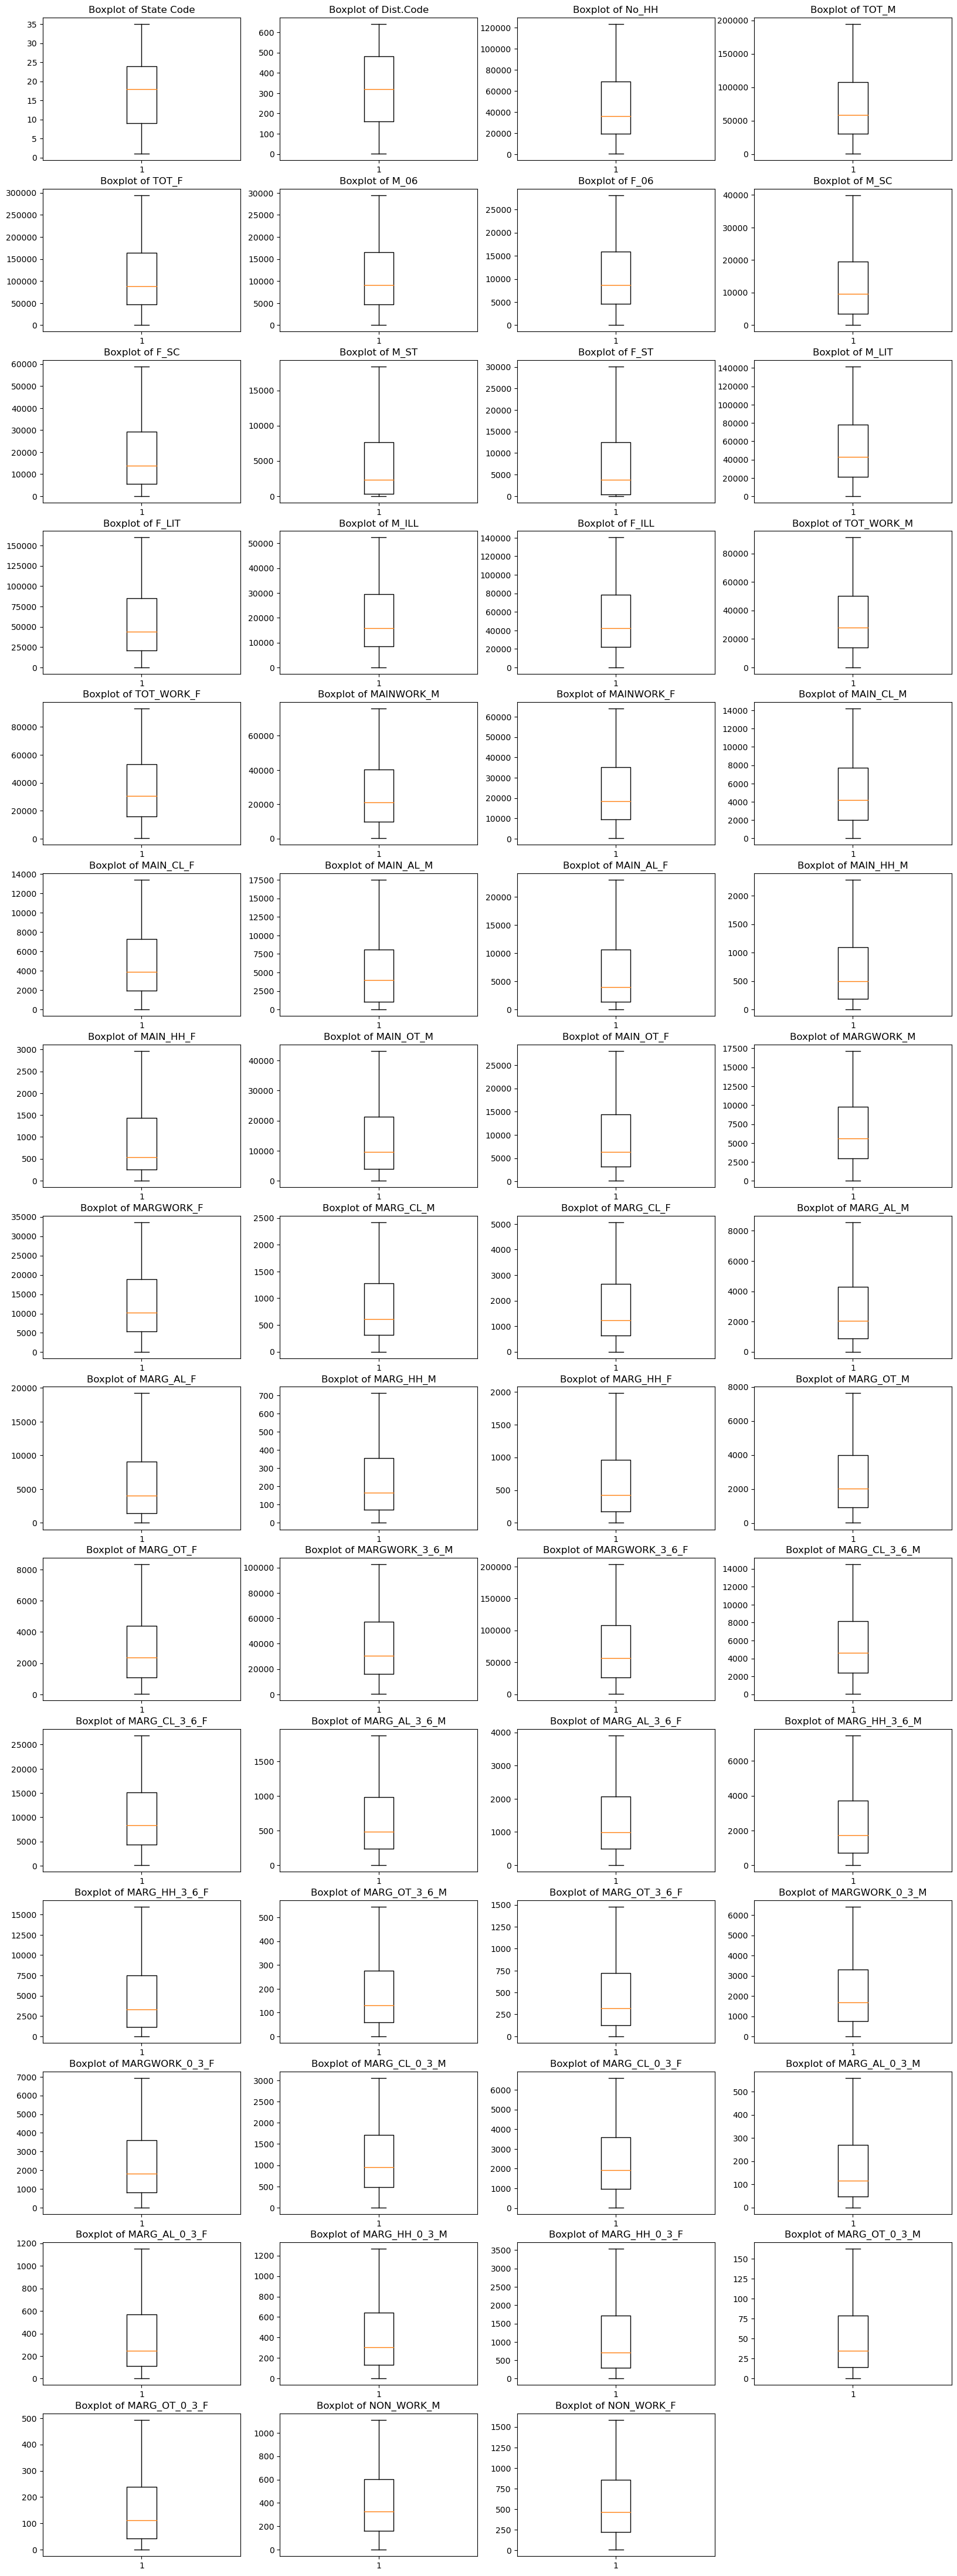

In [214]:
plt.figure(figsize=(20, 60))
plots_list = dbs.columns
for i in range(len(plots_list)):
    plt.subplot(16,4, i+1)
    plt.boxplot( dbs[plots_list[i]])
    plt.title('Boxplot of {}'.format(plots_list[i]))

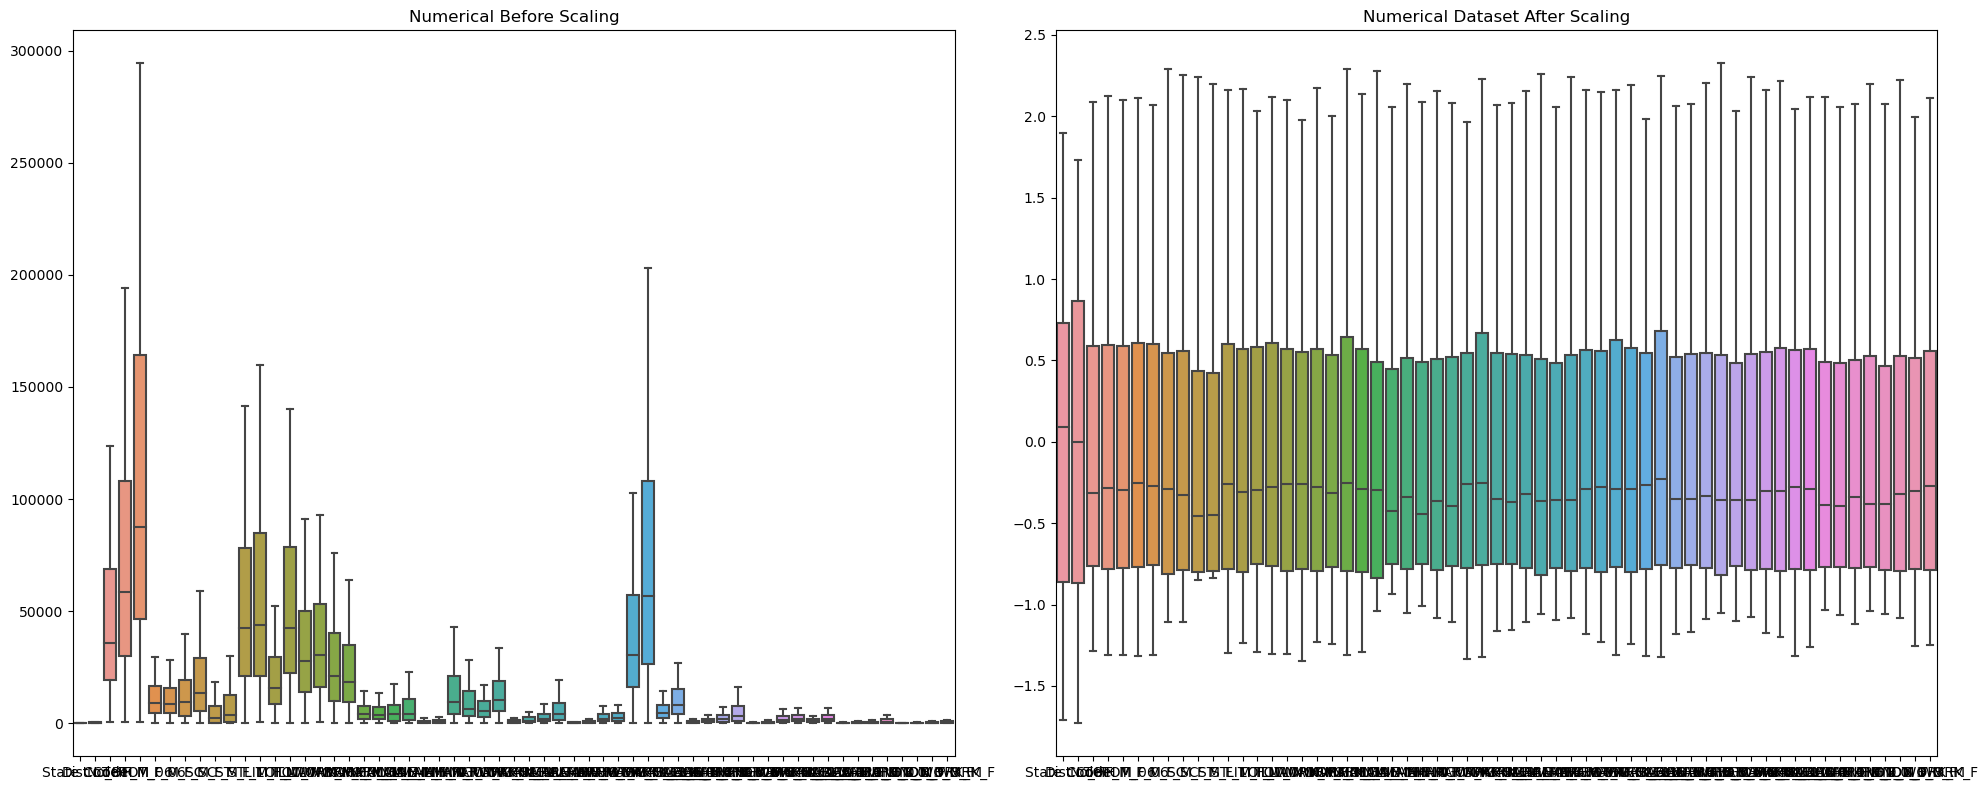

In [215]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=dbs)
plt.title('Numerical Before Scaling')

# After scaling
dbs_scaled = dbs.apply(zscore)

plt.subplot(1, 2, 2)
sns.boxplot(data=dbs_scaled)
plt.title('Numerical Dataset After Scaling')

plt.tight_layout()
plt.show()

In [127]:
dbs.isnull().sum()

State Code        0
Dist.Code         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0
MARGWORK_0_3_F    0
MARG_CL_0_3_M     0


In [128]:
dbs.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   47276.829688   74384.871094  113404.671875   
std      9.426486  184.896367   36540.749358   56464.265229   86136.422171   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  123520.000000  194226.250000  294335.000000   

               M_06          F_06          M_SC          F_SC          M_ST  \
count    640.000000    640.000000    640.000000    640.000000    640.000000   
mean   11339.029688  10920.925000  12990.417578  19440.505078   5045.352930   
std     8575.390049   8286.862181  11767.255759  17556.843365   5965.831556   
min       56.000000     56.000000      0.000000      0.000000      0.000000   
25%     4733.750000   4672.250000   3466.250000   5603.250000    293.750000   
50%     9159.000000   8663.000000   9591.500000  13709.000000   2333.500000   
75%    16520.250000  15902.250000  19429.750000  29180.000000   7658.000000   
max    29466.250000  28075.000000  39908.750000  58941.875000  18410.625000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1202.110547    2487.117188     183.530664     391.586328   
std    ...     909.958698    1948.235997     177.562414     368.162527   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    3061.250000    6606.250000     559.375000    1149.375000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      442.458203    1135.149414      54.908594     161.130469   
std       396.479062    1090.598170      51.883671     149.208120   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      1263.750000    3531.875000     162.500000     492.500000   

        NON_WORK_M   NON_WORK_F  
count   640.000000   640.000000  
mean    428.291406   590.996094  
std     341.214656   469.670546  
min       0.000000     5.000000  
25%     161.000000   220.500000  
50%     326.000000   464.500000  
75%     604.500000   853.500000  
max    1108.750000  1582.500000  

[8 rows x 59 columns]

In [141]:
from scipy.stats import zscore
dbs_scaled = dbs.apply(zscore)

In [130]:
dbs_scaled

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0     -1.710782  -1.729347 -1.083743 -0.903877 -0.971413 -0.639191 -0.570617   
1     -1.710782  -1.723934 -1.124524 -0.971282 -1.049188 -0.800243 -0.868066   
2     -1.710782  -1.718521 -1.172891 -1.202388 -1.190214 -1.197036 -1.195950   
3     -1.710782  -1.713109 -1.258671 -1.269066 -1.268733 -1.257606 -1.237131   
4     -1.710782  -1.707696 -0.975642 -0.953452 -0.969264 -0.721467 -0.764931   
..          ...        ...       ...       ...       ...       ...       ...   
635    1.792730   1.707696 -1.203539 -1.173887 -1.180722 -1.189567 -1.173608   
636    1.792730   1.713109 -1.004180 -1.099587 -1.065582 -1.143119 -1.133755   
637    1.898897   1.718521 -1.259903 -1.290955 -1.287043 -1.296818 -1.291718   
638    1.898897   1.723934 -1.191789 -1.226244 -1.224512 -1.238933 -1.238701   
639    1.898897   1.729347 -1.076403 -1.106128 -1.107897 -1.151755 -1.154889   

         M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0   -1.104555 -1.108155 -0.511033  ...      -0.057312      -0.892847   
1   -1.104214 -1.107813 -0.774739  ...      -0.744693      -0.910312   
2   -1.104555 -1.107813  0.127600  ...      -1.196715      -1.181025   
3   -1.104810 -1.108155 -0.399142  ...      -1.108731      -1.150718   
4   -1.103109 -1.106274  0.440291  ...      -0.360859      -0.287211   
..        ...       ...       ...  ...            ...            ...   
635 -1.103024 -1.106445 -0.846370  ...      -1.286900      -1.253455   
636 -0.914812 -0.871310 -0.846370  ...      -1.151623      -1.104486   
637 -1.104810 -1.108155 -0.676604  ...      -1.207714      -1.208764   
638 -1.104810 -1.108155 -0.841673  ...      -1.172520      -1.189244   
639 -1.104810 -1.108155 -0.819362  ...      -1.131827      -1.214928   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0        -0.019900      -0.420215       0.599597      -0.810418   
1        -0.341165      -0.441961      -0.647345      -0.905853   
2        -0.786427      -0.822525      -1.109269      -1.010464   
3        -0.690611      -0.716511      -1.084027      -0.995782   
4         1.586425       1.770748      -0.599386      -0.764536   
..             ...            ...            ...            ...   
635      -1.034421      -1.064455      -1.116842      -1.041664   
636      -1.017512      -1.026399      -1.020923      -0.922371   
637      -0.983695      -1.053582      -1.111793      -1.036159   
638      -0.899151      -0.944850      -1.089076      -1.022394   
639      -1.000603      -1.059019      -1.073931      -1.026064   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        -0.441883      -0.772213   -0.499464   -0.803310  
1         0.406831       0.113149   -0.845558   -0.918374  
2        -1.059130      -1.053920   -1.059667   -1.129325  
3        -0.981974      -1.013676   -0.915950   -1.133587  
4        -0.596195      -0.376483   -0.728238   -0.240774  
..             ...            ...         ...         ...  
635      -1.059130      -1.080749   -1.162322   -1.159156  
636      -0.981974      -0.926481   -0.933548   -0.897066  
637      -0.731217      -0.765506   -1.033270   -1.095232  
638      -1.039841      -1.053920   -0.962878   -1.039831  
639      -1.020552      -1.053920   -0.822094   -1.048354  

[640 rows x 59 columns]

In [131]:
dbs.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   47276.829688   74384.871094  113404.671875   
std      9.426486  184.896367   36540.749358   56464.265229   86136.422171   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  123520.000000  194226.250000  294335.000000   

               M_06          F_06          M_SC          F_SC          M_ST  \
count    640.000000    640.000000    640.000000    640.000000    640.000000   
mean   11339.029688  10920.925000  12990.417578  19440.505078   5045.352930   
std     8575.390049   8286.862181  11767.255759  17556.843365   5965.831556   
min       56.000000     56.000000      0.000000      0.000000      0.000000   
25%     4733.750000   4672.250000   3466.250000   5603.250000    293.750000   
50%     9159.000000   8663.000000   9591.500000  13709.000000   2333.500000   
75%    16520.250000  15902.250000  19429.750000  29180.000000   7658.000000   
max    29466.250000  28075.000000  39908.750000  58941.875000  18410.625000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1202.110547    2487.117188     183.530664     391.586328   
std    ...     909.958698    1948.235997     177.562414     368.162527   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    3061.250000    6606.250000     559.375000    1149.375000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      442.458203    1135.149414      54.908594     161.130469   
std       396.479062    1090.598170      51.883671     149.208120   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      1263.750000    3531.875000     162.500000     492.500000   

        NON_WORK_M   NON_WORK_F  
count   640.000000   640.000000  
mean    428.291406   590.996094  
std     341.214656   469.670546  
min       0.000000     5.000000  
25%     161.000000   220.500000  
50%     326.000000   464.500000  
75%     604.500000   853.500000  
max    1108.750000  1582.500000  

[8 rows x 59 columns]

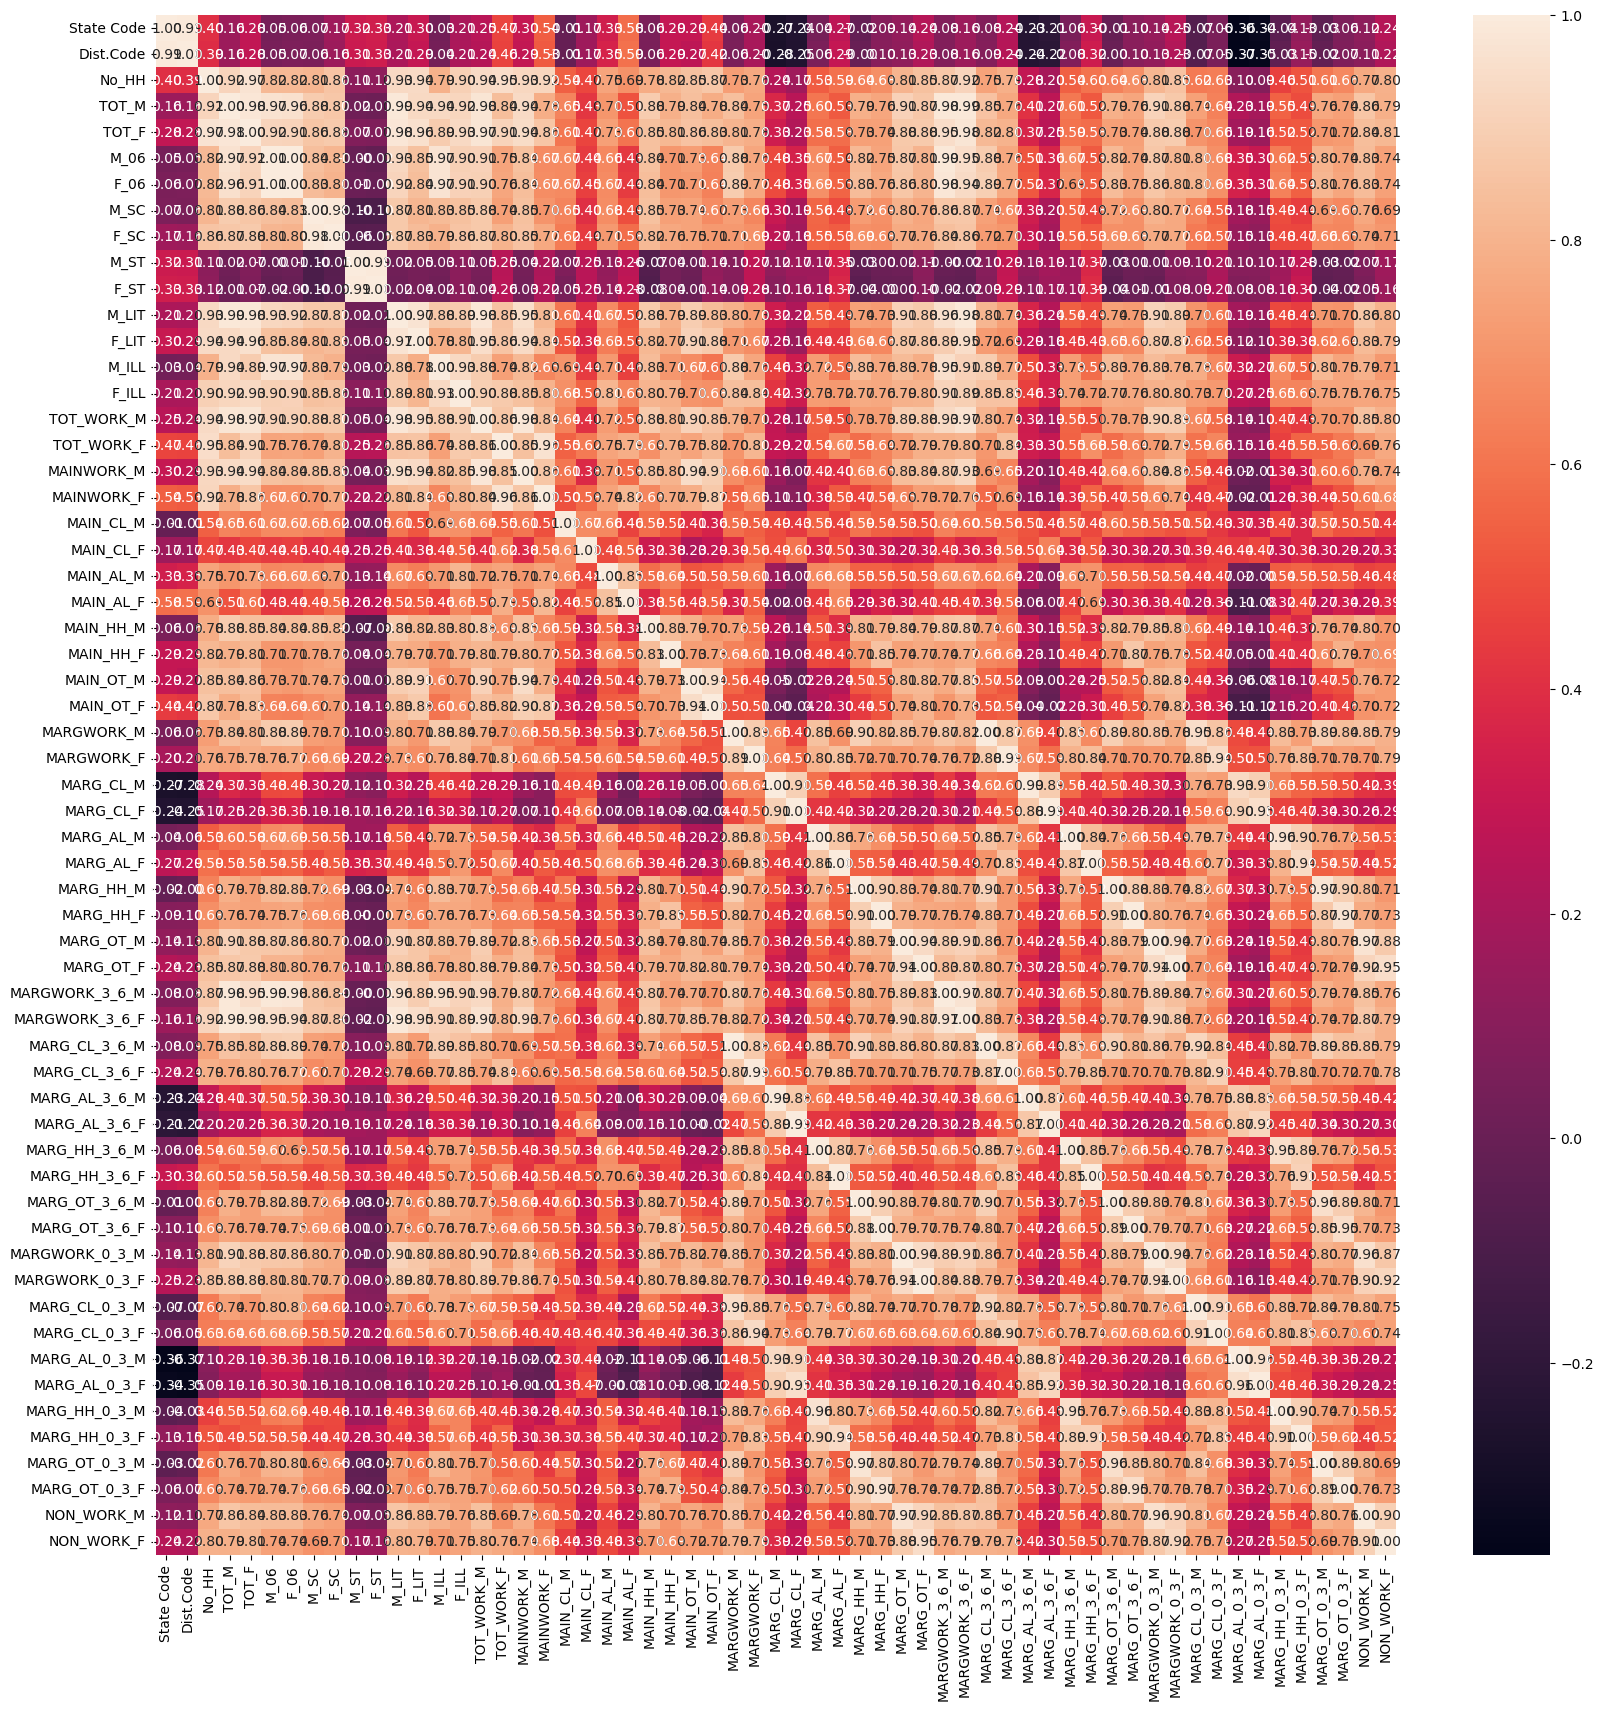

In [132]:
plt.figure(figsize= (20,20))
sns.heatmap(dbs_scaled.corr(), annot=True,fmt='.2f');

In [133]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(dbs_scaled)
print("P-value:", p_value)

P-value: 0.0


In [134]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dbs_scaled)
kmo_model

0.937558514556953

In [159]:
n=dbs_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=59, random_state=1)
data_pca1 = pca.fit_transform(dbs_scaled)
data_pca1
#The percentage of variance explained by each principal component
#exp_var = pca.explained_variance_ratio_
#exp_var

array([[-4.71938093e+00,  7.17504178e-01,  1.63226570e+00, ...,
        -9.47221026e-16,  6.41301106e-16, -5.47288215e-16],
       [-4.87329665e+00,  4.92000931e-01,  1.75212655e+00, ...,
         1.11977673e-15, -1.75043589e-15, -1.17043646e-15],
       [-6.06294775e+00,  2.33750925e-01,  1.33306811e+00, ...,
        -2.82163026e-16,  2.45156700e-16, -2.45791050e-16],
       ...,
       [-6.18034109e+00, -1.21626611e+00, -3.46108457e-01, ...,
         8.45362026e-17,  1.56095384e-16, -3.18129111e-16],
       [-6.10874064e+00, -1.24897987e+00, -2.79497463e-01, ...,
        -8.21103057e-16, -6.62830640e-16,  1.80715688e-17],
       [-5.78130461e+00, -1.50149133e+00, -1.86130470e-01, ...,
         1.67929495e-16, -1.16338310e-16, -4.18947431e-16]])

In [148]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  7


In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=59, random_state=1)
dbs_pca = pca.fit_transform(dbs_scaled)
dbs_pca

array([[-4.71938093e+00,  7.17504178e-01,  1.63226570e+00, ...,
        -9.47221026e-16,  6.41301106e-16, -5.47288215e-16],
       [-4.87329665e+00,  4.92000931e-01,  1.75212655e+00, ...,
         1.11977673e-15, -1.75043589e-15, -1.17043646e-15],
       [-6.06294775e+00,  2.33750925e-01,  1.33306811e+00, ...,
        -2.82163026e-16,  2.45156700e-16, -2.45791050e-16],
       ...,
       [-6.18034109e+00, -1.21626611e+00, -3.46108457e-01, ...,
         8.45362026e-17,  1.56095384e-16, -3.18129111e-16],
       [-6.10874064e+00, -1.24897987e+00, -2.79497463e-01, ...,
        -8.21103057e-16, -6.62830640e-16,  1.80715688e-17],
       [-5.78130461e+00, -1.50149133e+00, -1.86130470e-01, ...,
         1.67929495e-16, -1.16338310e-16, -4.18947431e-16]])

In [162]:
#Extract eigen vectors
pca.components_

array([[ 3.00700521e-02,  3.00751392e-02,  1.56432451e-01, ...,
         1.31868671e-01,  1.50219557e-01,  1.31179136e-01],
       [-1.62782525e-01, -1.58821825e-01, -1.28322211e-01, ...,
         5.40694563e-02, -5.44095594e-02, -6.94741471e-02],
       [-2.50129023e-01, -2.59359844e-01, -3.34978669e-02, ...,
        -1.83333910e-03,  1.28955424e-01,  8.67015734e-02],
       ...,
       [ 0.00000000e+00,  1.71303943e-17, -1.32697480e-15, ...,
         2.50846440e-02, -9.07111708e-02,  1.27677660e-02],
       [ 0.00000000e+00, -7.11236625e-17, -2.87360515e-16, ...,
         1.51696221e-03, -4.50040407e-02,  2.57762247e-02],
       [ 0.00000000e+00,  1.16551734e-17, -2.41559822e-15, ...,
        -4.84658783e-02,  5.33733512e-02,  4.36640439e-02]])

In [163]:
#Eigen values
pca.explained_variance_

array([3.18674263e+01, 8.18907061e+00, 4.54275124e+00, 3.84336785e+00,
       2.27105793e+00, 1.95992589e+00, 1.37548006e+00, 8.87342674e-01,
       7.19897963e-01, 6.14059555e-01, 4.94399686e-01, 4.24147991e-01,
       3.43932360e-01, 2.96118628e-01, 2.75961760e-01, 1.84995268e-01,
       1.28846861e-01, 1.11536962e-01, 1.03594789e-01, 9.73429345e-02,
       7.82132546e-02, 5.59614544e-02, 4.44214277e-02, 3.78654873e-02,
       2.96705436e-02, 2.70572400e-02, 2.34417688e-02, 1.43611558e-02,
       1.10964929e-02, 9.28775833e-03, 8.27176626e-03, 7.61344489e-03,
       5.02300148e-03, 4.49943614e-03, 2.51573519e-03, 1.06257176e-03,
       7.11882677e-04, 6.28474170e-30, 6.46518301e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
       1.64432752e-31, 1.64432752e-31, 1.64432752e-31, 1.64432752e-31,
      

In [164]:
var_exp =pca.explained_variance_ratio_
print(var_exp.round(2))

[0.54 0.14 0.08 0.07 0.04 0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]


In [165]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 53.93  67.79  75.47  81.98  85.82  89.14  91.47  92.97  94.19  95.22
  96.06  96.78  97.36  97.86  98.33  98.64  98.86  99.05  99.22  99.39
  99.52  99.62  99.69  99.76  99.81  99.85  99.89  99.92  99.93  99.95
  99.96  99.98  99.99  99.99 100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.  ]


Scree - plot

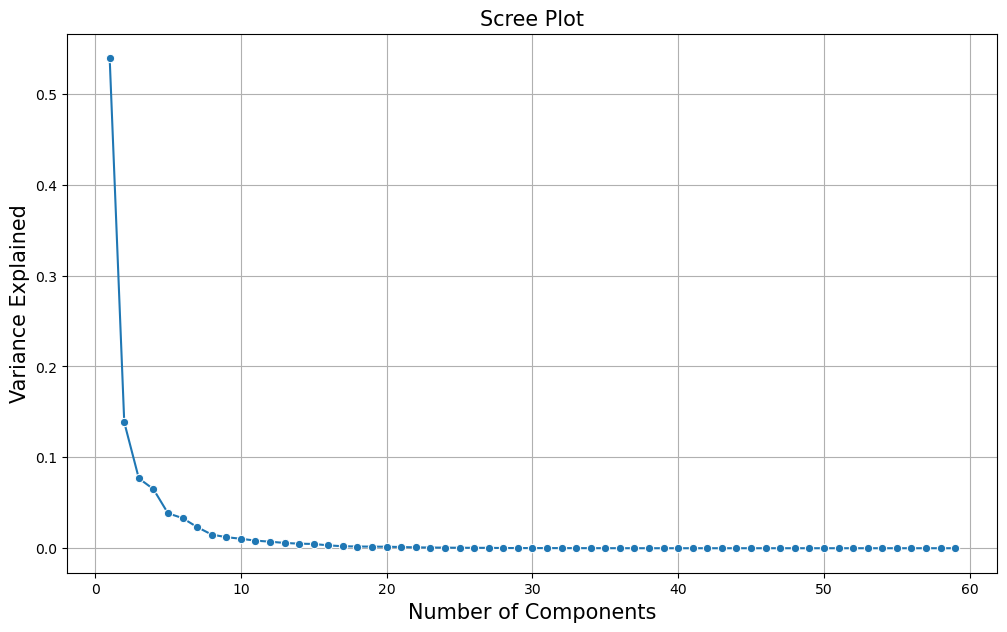

In [174]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The number of components can be decided based upon the explained variance. Here, it is decided to keep the number of components as 7 as the cumulative explained variance is around 90

In [167]:
total = 0
for ix, i in enumerate(var_exp):
    total = total+i
    if(total>0.90):
        print("number of PCs that explain 90% variance", ix+1)
        break

number of PCs that explain 90% variance 7


In [175]:
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=7, random_state=123)
dbs_pca = pca.fit_transform(dbs_scaled)
dbs_pca.transpose().round(2) # Component output

array([[-4.72, -4.87, -6.06, ..., -6.18, -6.11, -5.78],
       [ 0.72,  0.49,  0.23, ..., -1.22, -1.25, -1.5 ],
       [ 1.63,  1.75,  1.33, ..., -0.35, -0.28, -0.19],
       ...,
       [ 0.09, -0.26,  0.15, ...,  0.91,  0.78,  0.85],
       [-0.61,  0.31, -0.02, ...,  0.55,  0.31,  0.25],
       [ 0.74,  0.68,  1.12, ..., -1.85, -1.91, -1.88]])

In [176]:
dbs_pca.shape

(640, 7)

In [190]:
pca.components_.round(2)

In [169]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [170]:
pca.explained_variance_ratio_.round(2)

array([0.54, 0.14, 0.08, 0.07, 0.04, 0.03, 0.02])

In [191]:
dbs_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(dbs_scaled))


In [193]:
dbs_pca_loading.shape

(7, 59)

In [194]:
dbs_pca_loading.T

0     1     2     3     4     5     6
State Code      0.03 -0.16 -0.25  0.12  0.15  0.09 -0.35
Dist.Code       0.03 -0.16 -0.26  0.11  0.14  0.08 -0.35
No_HH           0.16 -0.13 -0.03  0.10 -0.02 -0.00 -0.05
TOT_M           0.17 -0.08  0.06  0.03 -0.05 -0.07  0.07
TOT_F           0.17 -0.10  0.02  0.07 -0.03 -0.05  0.01
M_06            0.16 -0.01  0.07  0.01 -0.07 -0.15  0.09
F_06            0.16 -0.01  0.06  0.00 -0.06 -0.15  0.09
M_SC            0.15 -0.04  0.04 -0.02 -0.19 -0.05  0.02
F_SC            0.15 -0.05 -0.01  0.00 -0.17 -0.02 -0.04
M_ST            0.03  0.01 -0.20  0.14  0.37  0.11  0.50
F_ST            0.03  0.01 -0.22  0.14  0.38  0.11  0.47
M_LIT           0.16 -0.11  0.08  0.06 -0.02 -0.06  0.04
F_LIT           0.15 -0.15  0.09  0.10  0.05 -0.05 -0.02
M_ILL           0.16  0.00  0.02 -0.05 -0.12 -0.11  0.16
F_ILL           0.17 -0.01 -0.09  0.01 -0.14 -0.03  0.05
TOT_WORK_M      0.16 -0.13  0.05  0.05 -0.03 -0.01  0.06
TOT_WORK_F      0.15 -0.10 -0.13  0.16 -0.06  0.10 -0.03
MAINWORK_M      0.15 -0.17  0.05  0.07 -0.05  0.01  0.08
MAINWORK_F      0.12 -0.16 -0.12  0.18 -0.11  0.12  0.00
MAIN_CL_M       0.10  0.06 -0.07  0.03 -0.31  0.01  0.25
MAIN_CL_F       0.07  0.07 -0.12  0.24 -0.26  0.12  0.12
MAIN_AL_M       0.11 -0.05 -0.24 -0.01 -0.24 -0.02  0.03
MAIN_AL_F       0.07 -0.08 -0.31  0.13 -0.22  0.02 -0.08
MAIN_HH_M       0.13 -0.06  0.10 -0.13 -0.10  0.19  0.08
MAIN_HH_F       0.08 -0.08 -0.02 -0.07 -0.09  0.44 -0.04
MAIN_OT_M       0.12 -0.20  0.13  0.09  0.06  0.01  0.04
MAIN_OT_F       0.11 -0.20  0.06  0.14  0.07  0.06  0.03
MARGWORK_M      0.16  0.10  0.02 -0.08  0.06 -0.09 -0.02
MARGWORK_F      0.16  0.11 -0.10  0.07  0.09  0.01 -0.09
MARG_CL_M       0.08  0.27  0.10  0.16  0.00  0.05 -0.02
MARG_CL_F       0.05  0.25  0.13  0.29 -0.03  0.11 -0.06
MARG_AL_M       0.13  0.16 -0.14 -0.16  0.00 -0.14  0.01
MARG_AL_F       0.11  0.12 -0.29 -0.02  0.04 -0.10 -0.06
MARG_HH_M       0.14  0.08  0.06 -0.21 -0.02  0.11  0.01
MARG_HH_F       0.13  0.03 -0.00 -0.20  0.03  0.37 -0.01
MARG_OT_M       0.16 -0.08  0.13 -0.02  0.13 -0.07 -0.04
MARG_OT_F       0.15 -0.11  0.10  0.03  0.18 -0.01 -0.09
MARGWORK_3_6_M  0.16 -0.03  0.07  0.02 -0.06 -0.13  0.07
MARGWORK_3_6_F  0.16 -0.10  0.09  0.03 -0.01 -0.11  0.02
MARG_CL_3_6_M   0.17  0.08  0.01 -0.09  0.05 -0.10 -0.01
MARG_CL_3_6_F   0.16  0.09 -0.12  0.07  0.06  0.01 -0.07
MARG_AL_3_6_M   0.09  0.26  0.08  0.12  0.01  0.02  0.00
MARG_AL_3_6_F   0.05  0.24  0.11  0.29 -0.04  0.11 -0.04
MARG_HH_3_6_M   0.13  0.15 -0.15 -0.16 -0.01 -0.14  0.01
MARG_HH_3_6_F   0.11  0.10 -0.31 -0.01  0.02 -0.10 -0.06
MARG_OT_3_6_M   0.14  0.07  0.07 -0.21 -0.02  0.12  0.01
MARG_OT_3_6_F   0.12  0.02 -0.00 -0.20  0.02  0.39 -0.00
MARGWORK_0_3_M  0.15 -0.08  0.13 -0.02  0.12 -0.07 -0.04
MARGWORK_0_3_F  0.15 -0.12  0.10  0.02  0.15 -0.00 -0.07
MARG_CL_0_3_M   0.15  0.15  0.06 -0.04  0.09 -0.06 -0.03
MARG_CL_0_3_F   0.14  0.17 -0.02  0.05  0.14 -0.01 -0.14
MARG_AL_0_3_M   0.05  0.25  0.15  0.23 -0.02  0.08 -0.07
MARG_AL_0_3_F   0.04  0.24  0.15  0.27 -0.02  0.10 -0.10
MARG_HH_0_3_M   0.12  0.18 -0.09 -0.17  0.06 -0.13 -0.00
MARG_HH_0_3_F   0.12  0.17 -0.20 -0.09  0.11 -0.12 -0.08
MARG_OT_0_3_M   0.14  0.09  0.06 -0.21  0.00  0.08 -0.00
MARG_OT_0_3_F   0.13  0.05 -0.00 -0.21  0.06  0.30 -0.03
NON_WORK_M      0.15 -0.05  0.13 -0.02  0.17 -0.06 -0.03
NON_WORK_F      0.13 -0.07  0.09  0.04  0.25 -0.04 -0.15

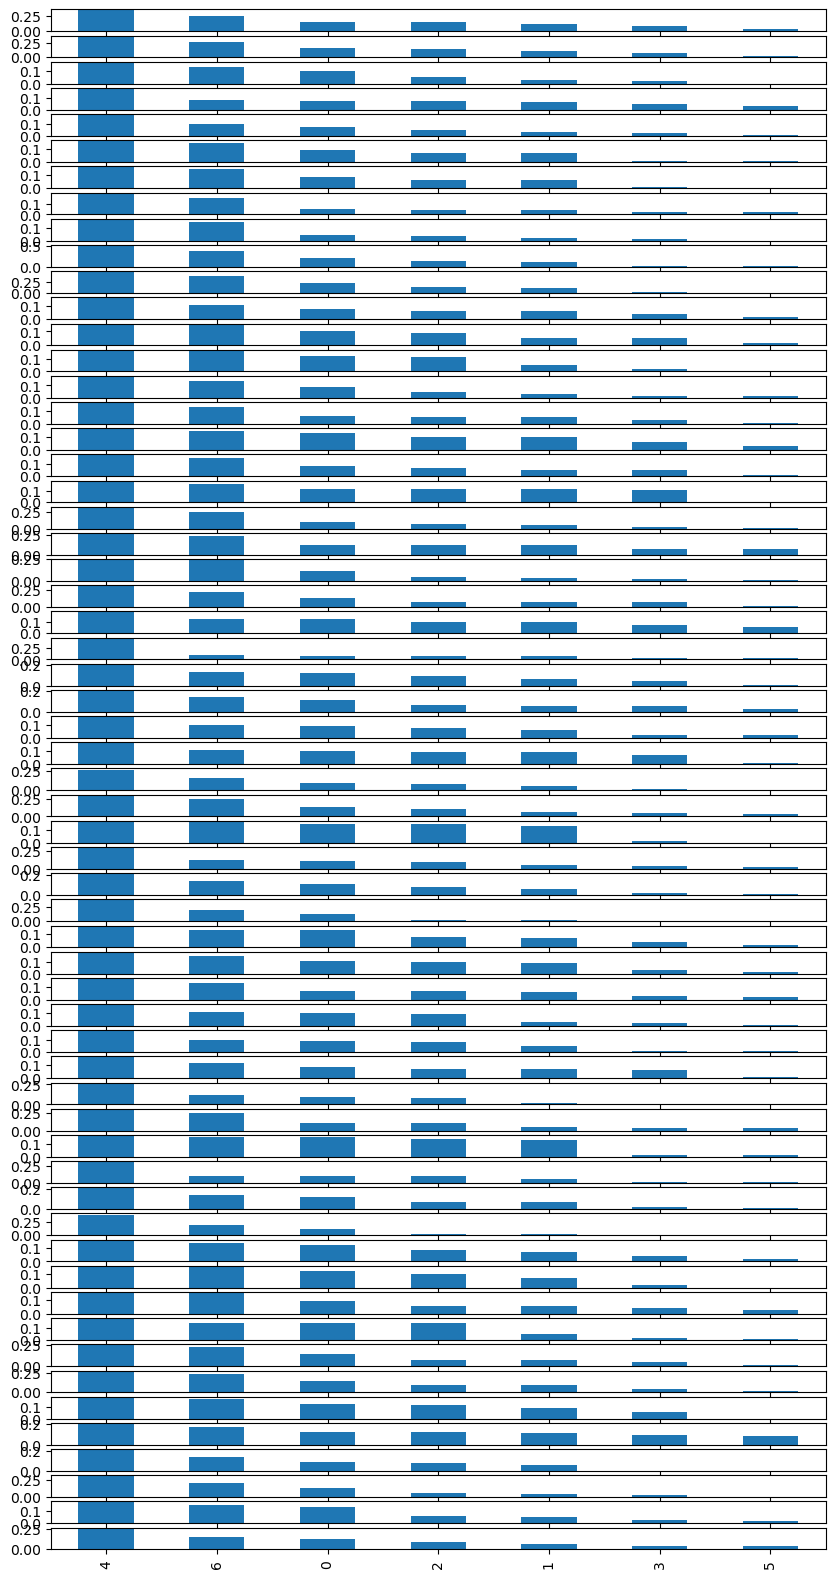

In [196]:
plt.figure(figsize= (10,20))
for i in range (len(dbs_pca_loading.columns)):
    plt.subplot(59,1,i+1)
    abs(dbs_pca_loading[dbs_pca_loading.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.tight_layout

Let's identify which features have maximum loading across the components.

We will first plot the component loading on a heatmap.

For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [185]:
from matplotlib.patches import Rectangle

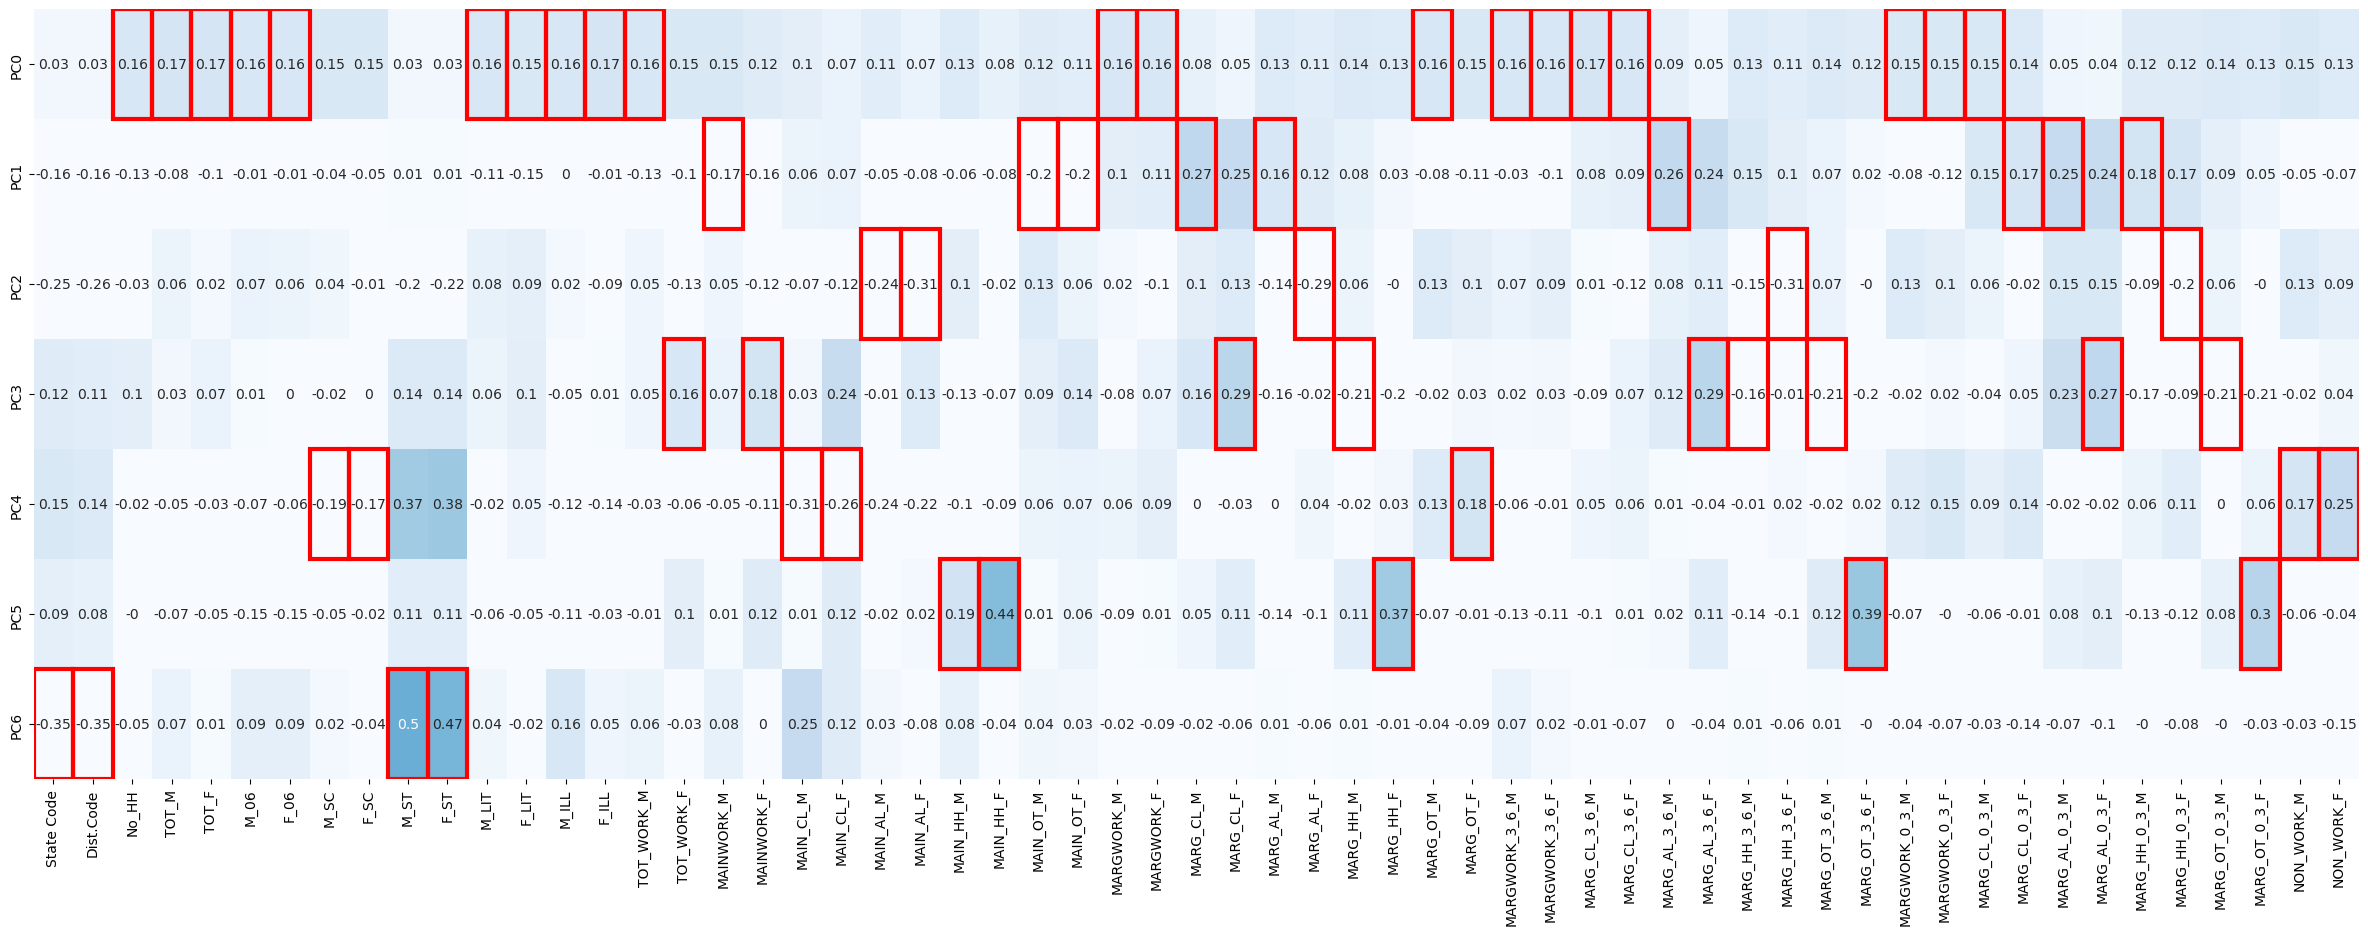

In [186]:
fig,ax = plt.subplots(figsize=(30, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(dbs_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = dbs_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(dbs_pca_loading.columns):
    position = dbs_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [187]:
dbs_pca = pd.DataFrame(dbs_pca.round(2),columns=['pc_1','pc_2','pc_3','pc_4','pc5','pc6','pc7'
                                  ])
dbs_pca

pc_1  pc_2  pc_3  pc_4   pc5   pc6   pc7
0   -4.72  0.72  1.63 -1.52  0.09 -0.61  0.74
1   -4.87  0.49  1.75 -1.94 -0.26  0.31  0.68
2   -6.06  0.23  1.33 -0.71  0.15 -0.02  1.12
3   -6.38  0.04  1.40 -1.19  0.01 -0.18  0.76
4   -4.58  1.43  1.72 -0.23  0.58  0.06  0.89
..    ...   ...   ...   ...   ...   ...   ...
635 -6.15 -1.41 -0.23 -0.49  0.75  0.25 -1.84
636 -5.66 -1.45 -0.31 -0.47  0.72  0.24 -1.90
637 -6.18 -1.22 -0.35 -0.68  0.91  0.55 -1.85
638 -6.11 -1.25 -0.28 -0.42  0.78  0.31 -1.91
639 -5.78 -1.50 -0.19 -0.37  0.85  0.25 -1.88

[640 rows x 7 columns]

In [182]:
dbs_pca.shape

(640, 7)

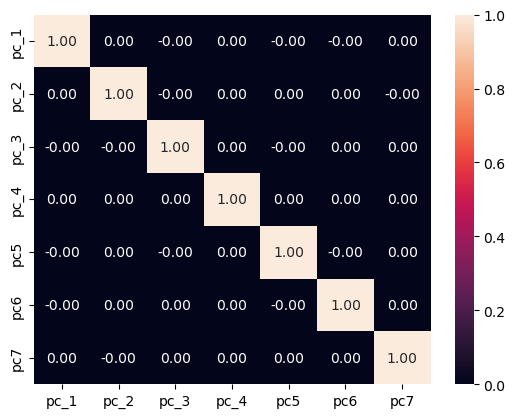

In [183]:
sns.heatmap(dbs_pca.corr(),annot = True, fmt = '.2f');

Once the original variables are replaced by the PCs, the latter are used for any further analysis. Just as each observed unit has a particular value of each variable, similarly each observation has a particular value for each PC. These values are called PC scores.

In [162]:
df_new = pd.concat([db_cat, dbs_pca], axis=1)

In [163]:
df_new

State                Area Name  pc_1  pc_2  pc_3  pc_4
0             Jammu & Kashmir                  Kupwara -5.78  1.09 -2.14 -1.37
1             Jammu & Kashmir                   Badgam -5.76  0.56 -2.75 -1.87
2             Jammu & Kashmir              Leh(Ladakh) -7.86  0.31 -1.09  0.04
3             Jammu & Kashmir                   Kargil -8.34 -0.13 -1.53 -0.75
4             Jammu & Kashmir                    Punch -5.41  3.04 -1.53  1.07
..                        ...                      ...   ...   ...   ...   ...
635                Puducherry                     Mahe -8.15 -1.96  0.34 -0.96
636                Puducherry                 Karaikal -7.40 -2.06  0.41 -0.98
637  Andaman & Nicobar Island                 Nicobars -8.09 -1.68  0.37 -1.37
638  Andaman & Nicobar Island  North  & Middle Andaman -8.06 -1.66  0.41 -0.87
639  Andaman & Nicobar Island            South Andaman -7.58 -2.08  0.32 -0.76

[640 rows x 6 columns]

In [164]:
df_new.describe(include='all')

State Area Name        pc_1        pc_2        pc_3  \
count             640       640  640.000000  640.000000  640.000000   
unique             35       635         NaN         NaN         NaN   
top     Uttar Pradesh   Raigarh         NaN         NaN         NaN   
freq               71         2         NaN         NaN         NaN   
mean              NaN       NaN   -0.000016    0.000031   -0.000047   
std               NaN       NaN    6.002339    2.800976    2.118636   
min               NaN       NaN   -8.720000   -7.350000   -5.410000   
25%               NaN       NaN   -4.570000   -1.842500   -1.640000   
50%               NaN       NaN   -1.355000   -0.270000   -0.215000   
75%               NaN       NaN    4.117500    1.960000    1.482500   
max               NaN       NaN   15.440000    7.700000    5.690000   

              pc_4  
count   640.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      0.000063  
std       1.647425  
min      -4.570000  
25%      -0.970000  
50%      -0.270000  
75%       0.802500  
max       6.170000

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='city',y='pc_loan_repayment', data=df_new)